#Basic Neural Network

##Single Layer Perceptron in TensorFlow

###Step1: Import necessary libraries

###Numpy – Numpy arrays are very fast and can perform large computations in a very short time.
###Matplotlib – This library is used to draw visualizations.
###TensorFlow – This is an open-source library that is used for Machine Learning and Artificial intelligence and provides a range of functions to achieve
###complex functionalities with single lines of code.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline


###Step 2: Now load the dataset using “Keras” from the imported version of tensor flow.



In [ ]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 2s 0us/step


###Step 3: Now display the shape and image of the single image in the dataset. The image size contains a 28*28 matrix and length of the training set is 60,000 and the testing set is 10,000.



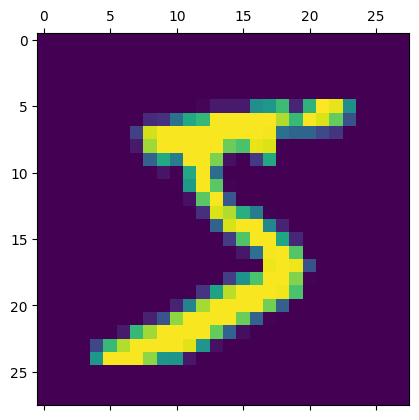

In [ ]:
len(x_train)
len(x_test)
x_train[0].shape
plt.matshow(x_train[0])


###Step 4: Now normalize the dataset in order to compute the calculations in a fast and accurate manner.



In [ ]:
# Normalizing the dataset
x_train = x_train/255
x_test = x_test/255

# Flatting the dataset in order
# to compute for model building
x_train_flatten = x_train.reshape(len(x_train), 28*28)
x_test_flatten = x_test.reshape(len(x_test), 28*28)


###Step 5: Building a neural network with single-layer perception. Here we can observe as the model is a single-layer perceptron that only contains one input layer and one output layer there is no presence of the hidden layers.  

In [ ]:
model = keras.Sequential([
	keras.layers.Dense(10, input_shape=(784,),
					activation='sigmoid')
])
model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy'])

model.fit(x_train_flatten, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4700 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3039 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2835 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2730 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2670 - accuracy: 0.9255


###Step 6: Output the accuracy of the model on the testing data.



In [ ]:
model.evaluate(x_test_flatten, y_test)


313/313 [==============================] - 1s 4ms/step - loss: 0.2670 - accuracy: 0.9255


[0.266995906829834, 0.9254999756813049]

##Multi-Layer Perceptron Learning in Tensorflow

###Step 1: Import the necessary libraries.



In [ ]:
# importing modules
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
import matplotlib.pyplot as plt


###Step 2: Download the dataset. TensorFlow allows us to read the MNIST dataset and we can load it directly in the program as a train and test dataset.

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


###Step 3: Now we will convert the pixels into floating-point values.

In [ ]:
# Cast the records into float values
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize image pixel values by dividing
# by 255
gray_scale = 255
x_train /= gray_scale
x_test /= gray_scale


###Step 4: Understand the structure of the dataset

In [ ]:
print("Feature matrix:", x_train.shape)
print("Target matrix:", x_test.shape)
print("Feature matrix:", y_train.shape)
print("Target matrix:", y_test.shape)


Feature matrix: (60000, 28, 28)
Target matrix: (10000, 28, 28)
Feature matrix: (60000,)
Target matrix: (10000,)


###Step 5: Visualize the data.

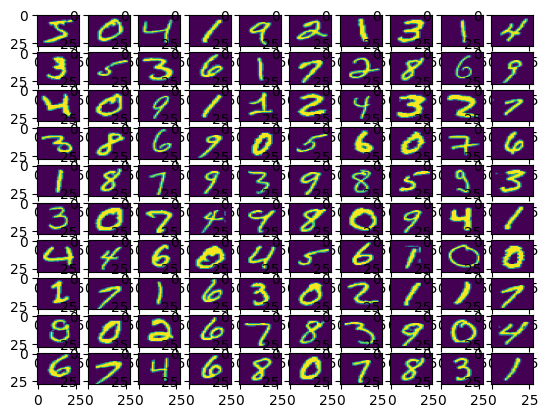

In [ ]:
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
	for j in range(10):
		ax[i][j].imshow(x_train[k].reshape(28, 28),
						aspect='auto')
		k += 1
plt.show()


###Step 6: Form the Input, hidden, and output layers.

In [ ]:
model = Sequential([

	# reshape 28 row * 28 column data to 28*28 rows
	Flatten(input_shape=(28, 28)),

	# dense layer 1
	Dense(256, activation='sigmoid'),

	# dense layer 2
	Dense(128, activation='sigmoid'),

	# output layer
	Dense(10, activation='sigmoid'),
])


###Step 7: Compile the model.

In [ ]:
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


###Step 8: Fit the model.

In [ ]:
model.fit(x_train, y_train, epochs=10,
		batch_size=2000,
		validation_split=0.2)


Epoch 1/10
24/24 [==============================] - 4s 111ms/step - loss: 1.7764 - accuracy: 0.5596 - val_loss: 1.1791 - val_accuracy: 0.8134
Epoch 2/10
24/24 [==============================] - 1s 58ms/step - loss: 0.8991 - accuracy: 0.8352 - val_loss: 0.6304 - val_accuracy: 0.8839
Epoch 3/10
24/24 [==============================] - 2s 84ms/step - loss: 0.5409 - accuracy: 0.8876 - val_loss: 0.4256 - val_accuracy: 0.9062
Epoch 4/10
24/24 [==============================] - 2s 73ms/step - loss: 0.4003 - accuracy: 0.9057 - val_loss: 0.3397 - val_accuracy: 0.9177
Epoch 5/10
24/24 [==============================] - 1s 50ms/step - loss: 0.3299 - accuracy: 0.9161 - val_loss: 0.2974 - val_accuracy: 0.9239
Epoch 6/10
24/24 [==============================] - 1s 48ms/step - loss: 0.2889 - accuracy: 0.9245 - val_loss: 0.2679 - val_accuracy: 0.9300
Epoch 7/10
24/24 [==============================] - 1s 49ms/step - loss: 0.2609 - accuracy: 0.9303 - val_loss: 0.2430 - val_accuracy: 0.9335
Epoch 8/10
2

###Step 9: Find Accuracy of the model.

In [ ]:
results = model.evaluate(x_test, y_test, verbose = 0)
print('test loss, test acc:', results)


test loss, test acc: [0.2084985375404358, 0.9423999786376953]


##Deep Neural net with forward and back propagation from scratch – Python

###Code: Visualizing the data

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model

def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(x)
    """
    s = 1/(1+np.exp(-x))
    return s

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j

    X = X.T
    Y = Y.T

    return X, Y

def load_extra_datasets():
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

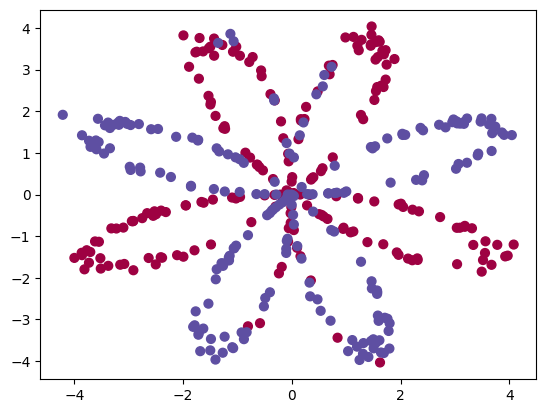

In [ ]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
# here planar_utils.py can be found on its github repo
#from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset
# Loading the Sample data
X, Y = load_planar_dataset()
m = Y.shape[1]
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c = Y, s = 40, cmap = plt.cm.Spectral);


###Code: Initializing the Weight and bias matrix

In [ ]:
# X --> input dataset of shape (input size, number of examples)
# Y --> labels of shape (output size, number of examples)

W1 = np.random.randn(4, X.shape[0]) * 0.01
b1 = np.zeros(shape =(4, 1))

W2 = np.random.randn(Y.shape[0], 4) * 0.01
b2 = np.zeros(shape =(Y.shape[0], 1))


###Code: Forward Propagation

In [ ]:
def forward_prop(X, W1, W2, b1, b2):

	Z1 = np.dot(W1, X) + b1
	A1 = np.tanh(Z1)
	Z2 = np.dot(W2, A1) + b2
	A2 = sigmoid(Z2)

	# here the cache is the data of previous iteration
	# This will be used for backpropagation
	cache = {"Z1": Z1,
			"A1": A1,
			"Z2": Z2,
			"A2": A2}

	return A2, cache


###Code: Defining the cost function :

In [ ]:
# Here Y is actual output
def compute_cost(A2, Y):
	m = Y.shape[1]
	# implementing the above formula
	cost_sum = np.multiply(np.log(A2), Y) + np.multiply((1 - Y), np.log(1 - A2))
	cost = - np.sum(cost_sum) / m

	# Squeezing to avoid unnecessary dimensions
	cost = np.squeeze(cost)
	return cost


###Code: Finally back-propagating function:

In [ ]:
def back_propagate(W1, b1, W2, b2, cache):
    # Retrieve A1 and A2 from the cache dictionary
    A1 = cache['A1']
    A2 = cache['A2']
    X, Y = load_planar_dataset()
    m = Y.shape[1]
    learning_rate = 0.1

    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2 = A2 - Y

    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

    # Updating the parameters according to the algorithm
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, W2, b1, b2


###Code: Training the custom model

In [ ]:
num_iterations=10000

In [ ]:
# Please note that the weights and bias are global
# Here num_iteration is epochs
for i in range(0, num_iterations):

		# Forward propagation. Inputs: "X, parameters". return: "A2, cache".
		A2, cache = forward_prop(X, W1, W2, b1, b2)

		# Cost function. Inputs: "A2, Y". Outputs: "cost".
		cost = compute_cost(A2, Y)

		# Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
		W1, W2, b1, b2 = back_propagate(W1, b1, W2, b2, cache)

		# Print the cost every 1000 iterations
		if cost and i % 1000 == 0:
			print ("Cost after iteration % i: % f" % (i, cost))



Cost after iteration  0:  0.273401
Cost after iteration  1000:  0.272505
Cost after iteration  2000:  0.271656
Cost after iteration  3000:  0.270847
Cost after iteration  4000:  0.270074
Cost after iteration  5000:  0.269333
Cost after iteration  6000:  0.268622
Cost after iteration  7000:  0.267936
Cost after iteration  8000:  0.267274
Cost after iteration  9000:  0.266633


#Artificial Neural Network




##Gradient Descent Optimization in Tensorflow

In [ ]:
# Import tensorflow 2 as tensorflow 1
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# Define the placeholders for
# the input and output data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

# Define the placeholders for
# the input and output data
x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)


In [ ]:
# Define the model parameters
w = tf.Variable(0.5, name="weights")


In [ ]:
# Define the linear regression model
model = tf.add(tf.multiply(x, w), 0.5)


In [ ]:
# model.run_eagerly = True

In [ ]:
# Define the cost function (MSE)
cost = tf.reduce_mean(tf.square(model - y))


In [ ]:
# Create the gradient descent optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)


In [ ]:
# Minimize the cost function
train = optimizer.minimize(cost)


In [ ]:
# Define the toy dataset
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# Create a TensorFlow session
with tf.Session() as sess:
	# Initialize the variables
	sess.run(tf.global_variables_initializer())

	# Training loop
	for i in range(1000):
		sess.run(train,
				feed_dict={x: x_train,
							y: y_train})

	# Evaluate the model
	w_val = sess.run(w)

# Mean Squared Error (MSE) between
# the predicted and true output values
print(w_val)


1.833333


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Set up the data and model
X = tf.constant([[1.], [2.], [3.], [4.]])
y = tf.constant([[2.], [4.], [6.], [8.]])

w = tf.Variable(0.)
b = tf.Variable(0.)

# Define the model and loss function
def model(x):
	return w * x + b

def loss(predicted_y, true_y):
	return tf.reduce_mean(tf.square(predicted_y - true_y))

# Set the learning rate
learning_rate = 0.001

# Training loop
losses = []
for i in range(250):
	with tf.GradientTape() as tape:
		predicted_y = model(X)
		current_loss = loss(predicted_y, y)
	gradients = tape.gradient(current_loss, [w, b])
	w.assign_sub(learning_rate * gradients[0])
	b.assign_sub(learning_rate * gradients[1])

	# losses.append(current_loss.numpy())

# Plot the loss
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()


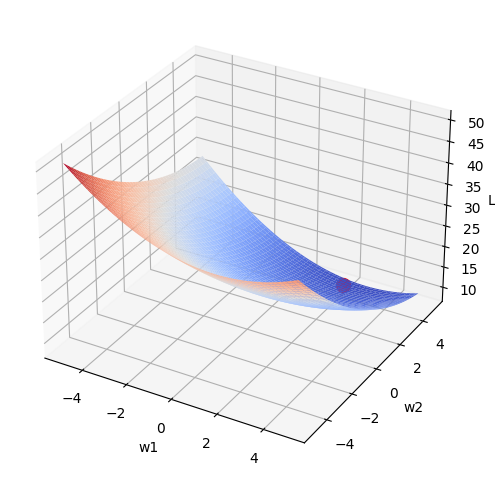

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1) - 1
y = 4 + 3 * X + np.random.randn(100, 1)

# Initialize model parameters
w = np.random.randn(2, 1)
b = np.random.randn(1)[0]

# Set the learning rate
alpha = 0.1

# Set the number of iterations
num_iterations = 20

# Create a mesh to plot the loss surface
w1, w2 = np.meshgrid(np.linspace(-5, 5, 100),
					np.linspace(-5, 5, 100))

# Compute the loss for each point on the grid
loss = np.zeros_like(w1)
for i in range(w1.shape[0]):
	for j in range(w1.shape[1]):
		loss[i, j] = np.mean((y - w1[i, j] * X - w2[i, j] * X**2)**2)

# Perform gradient descent
for i in range(num_iterations):
	# Compute the gradient of the loss
	# with respect to the model parameters
	grad_w1 = -2 * np.mean(X * (y - w[0]  * X - w[1] * X**2))
	grad_w2 = -2 * np.mean(X**2 * (y - w[0] * X - w[1] * X**2))

	# Update the model parameters
	w[0] -= alpha * grad_w1
	w[1] -= alpha * grad_w2

# Plot the loss surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(w1, w2, loss, cmap='coolwarm')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Loss')

# Plot the trajectory of the gradient descent algorithm
ax.plot(w[0], w[1], np.mean((y - w[0] * X - w[1] * X**2)**2), 'o', c='red', markersize=10)
plt.show()


##Choose optimal number of epochs to train a neural network in Keras

###Step 1: Loading dataset and preprocessing

In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=7cec327c9e76e7deca39ce4ff1102ca9ec6f972e8252737a7d9bc3d676747c0d
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
import keras
from keras.utils import to_categorical
from keras.datasets import mnist

# Loading data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshaping data-Adding number of channels as 1 (Grayscale images)
train_images = train_images.reshape((train_images.shape[0],
									train_images.shape[1],
									train_images.shape[2], 1))

test_images = test_images.reshape((test_images.shape[0],
								test_images.shape[1],
								test_images.shape[2], 1))

# Scaling down pixel values
train_images = train_images.astype('float32')/255
test_images = test_images.astype('float32')/255

# Encoding labels to a binary class matrix
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


###Step 2: Building a CNN model



In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation="relu",
						input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

###Step 4: Compiling the model with RMSprop optimizer, categorical cross entropy loss function and accuracy as success metric

In [ ]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

###Step 5: Creating a validation set and training set by partitioning the current training set

In [ ]:
val_images = train_images[:10000]
partial_images = train_images[10000:]
val_labels = y_train[:10000]
partial_labels = y_train[10000:]


###Step 6: Initializing early stopping callback and training the model.

In [ ]:
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min", patience=5, restore_best_weights=True)

history = model.fit(partial_images, partial_labels, batch_size=128, epochs=25, validation_data=(val_images, val_labels), callbacks=[earlystopping])


Train on 50000 samples, validate on 10000 samples
Epoch 1/25
49920/50000 [============================>.] - ETA: 0s - loss: 0.2436 - acc: 0.9259

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


50000/50000 [==============================] - 40s 791us/sample - loss: 0.2433 - acc: 0.9260 - val_loss: 0.0761 - val_acc: 0.9780
Epoch 2/25
50000/50000 [==============================] - 35s 692us/sample - loss: 0.0647 - acc: 0.9801 - val_loss: 0.0517 - val_acc: 0.9862
Epoch 3/25
50000/50000 [==============================] - 38s 758us/sample - loss: 0.0435 - acc: 0.9863 - val_loss: 0.0456 - val_acc: 0.9862
Epoch 4/25
50000/50000 [==============================] - 35s 692us/sample - loss: 0.0322 - acc: 0.9904 - val_loss: 0.0475 - val_acc: 0.9872
Epoch 5/25
50000/50000 [==============================] - 36s 721us/sample - loss: 0.0257 - acc: 0.9919 - val_loss: 0.0366 - val_acc: 0.9893
Epoch 6/25
50000/50000 [==============================] - 39s 770us/sample - loss: 0.0191 - acc: 0.9941 - val_loss: 0.0439 - val_acc: 0.9885
Epoch 7/25
50000/50000 [==============================] - 35s 698us/sample - loss: 0.0160 - acc: 0.9951 - val_loss: 0.0520 - val_acc: 0.9857
Epoch 8/25
50000/50000 [

#Train a Deep Learning Model With Pytorch



###Step 1: Import the necessary Libraries


In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
import torch.nn.functional as F


###Step 2: Load the MNIST Datasets


In [ ]:
# Load the MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
										train=True,
										transform=torchvision.transforms.ToTensor(),
										download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
										train=False,
										transform=torchvision.transforms.ToTensor(),
										download=True)


100%|██████████| 9912422/9912422 [00:00<00:00, 100249591.88it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 9447488.21it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31942448.17it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 16199429.22it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



###Step 3: Build the model


In [ ]:
class Classifier(nn.Module):
	def __init__(self):
		super().__init__()
		self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
		self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
		self.pool = nn.MaxPool2d(2, 2)
		self.dropout1 = nn.Dropout2d(0.25)
		self.dropout2 = nn.Dropout2d(0.5)
		self.fc1 = nn.Linear(64 * 7 * 7, 128)
		self.fc2 = nn.Linear(128, 10)

	def forward(self, x):
		x = self.pool(F.relu(self.conv1(x)))
		x = self.dropout1(x)
		x = self.pool(F.relu(self.conv2(x)))
		x = self.dropout2(x)
		x = x.view(-1, 64 * 7 * 7)
		x = F.relu(self.fc1(x))
		x = self.fc2(x)
		return x


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


device(type='cpu')

In [ ]:
# Instantiate the model
model = Classifier()

# Move the model to the GPU if available
model.to(device)
summary(model, (1, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
         Dropout2d-3           [-1, 32, 14, 14]               0
            Conv2d-4           [-1, 64, 14, 14]          18,496
         MaxPool2d-5             [-1, 64, 7, 7]               0
         Dropout2d-6             [-1, 64, 7, 7]               0
            Linear-7                  [-1, 128]         401,536
            Linear-8                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.43
Params size (MB): 1.61
Estimated Total Size (MB): 2.04
----------------------------------------------------------------


###Step 4: Define the loss function and optimizer


In [ ]:
# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


###Step 5: Train the model


In [ ]:
batch_size=100
num_epochs=10
# Split the training set into training and validation sets
val_percent = 0.2 # percentage of the data used for validation
val_size = int(val_percent * len(train_dataset))
train_size = len(train_dataset) - val_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset,
														[train_size,
															val_size])

# Create DataLoaders for the training and validation sets
train_loader = torch.utils.data.DataLoader(train_dataset,
										batch_size=batch_size,
										shuffle=True,
										pin_memory=True)
val_loader = torch.utils.data.DataLoader(val_dataset,
										batch_size=batch_size,
										shuffle=False,
										pin_memory=True)
losses = []
accuracies = []
val_losses = []
val_accuracies = []
# Train the model
for epoch in range(num_epochs):
	for i, (images, labels) in enumerate(train_loader):
		# Forward pass
		images=images.to(device)
		labels=labels.to(device)
		outputs = model(images)
		loss = criterion(outputs, labels)

		# Backward pass and optimization
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		_, predicted = torch.max(outputs.data, 1)
	acc = (predicted == labels).sum().item() / labels.size(0)
	accuracies.append(acc)
	losses.append(loss.item())

	# Evaluate the model on the validation set
	val_loss = 0.0
	val_acc = 0.0
	with torch.no_grad():
		for images, labels in val_loader:
			labels=labels.to(device)
			images=images.to(device)
			outputs = model(images)
			loss = criterion(outputs, labels)
			val_loss += loss.item()

			_, predicted = torch.max(outputs.data, 1)
		total = labels.size(0)
		correct = (predicted == labels).sum().item()
		val_acc += correct / total
		val_accuracies.append(acc)
		val_losses.append(loss.item())


	print('Epoch [{}/{}],Loss:{:.4f},Validation Loss:{:.4f},Accuracy:{:.2f},Validation Accuracy:{:.2f}'.format(
		epoch+1, num_epochs, loss.item(), val_loss, acc ,val_acc))


Epoch [1/10],Loss:0.0931,Validation Loss:12.2942,Accuracy:0.98,Validation Accuracy:0.97
Epoch [2/10],Loss:0.0555,Validation Loss:10.1149,Accuracy:0.97,Validation Accuracy:0.98
Epoch [3/10],Loss:0.0575,Validation Loss:8.4746,Accuracy:1.00,Validation Accuracy:0.98
Epoch [4/10],Loss:0.0449,Validation Loss:6.6678,Accuracy:0.98,Validation Accuracy:0.98
Epoch [5/10],Loss:0.0142,Validation Loss:7.1718,Accuracy:1.00,Validation Accuracy:1.00
Epoch [6/10],Loss:0.0169,Validation Loss:6.3728,Accuracy:0.99,Validation Accuracy:1.00
Epoch [7/10],Loss:0.0567,Validation Loss:6.4683,Accuracy:0.99,Validation Accuracy:0.97
Epoch [8/10],Loss:0.0196,Validation Loss:6.0640,Accuracy:0.99,Validation Accuracy:0.99
Epoch [9/10],Loss:0.0144,Validation Loss:5.8045,Accuracy:0.99,Validation Accuracy:1.00
Epoch [10/10],Loss:0.0294,Validation Loss:6.4423,Accuracy:0.98,Validation Accuracy:0.99


###Step 6: Plot Training and Validation curve to check overfitting or underfitting


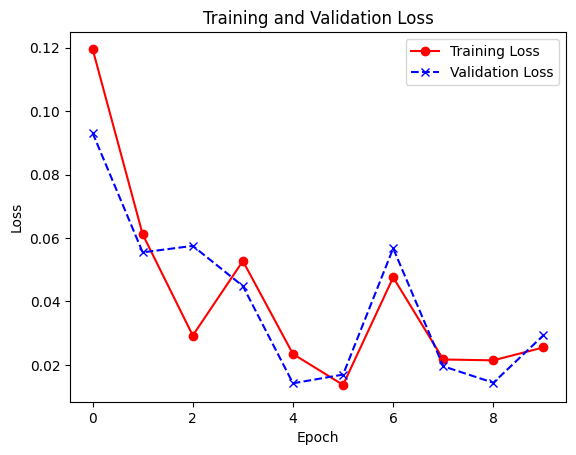

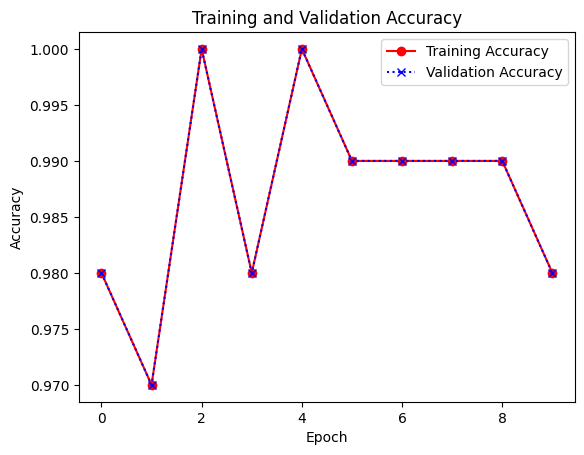

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss over time
plt.plot(range(num_epochs),
		losses, color='red',
		label='Training Loss',
		marker='o')
plt.plot(range(num_epochs),
		val_losses,
		color='blue',
		linestyle='--',
		label='Validation Loss',
		marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over time
plt.plot(range(num_epochs),
		accuracies,
		label='Training Accuracy',
		color='red',
		marker='o')
plt.plot(range(num_epochs),
		val_accuracies,
		label='Validation Accuracy',
		color='blue',
		linestyle=':',
		marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


###Step 7: Evaluation


In [ ]:
# Create a DataLoader for the test dataset
test_loader = torch.utils.data.DataLoader(test_dataset,
										batch_size=batch_size,
										shuffle=False)

# Evaluate the model on the test dataset
model.eval()

with torch.no_grad():
	correct = 0
	total = 0
	y_true = []
	y_pred = []
	for images, labels in test_loader:
		images = images.to(device)
		labels = labels.to(device)
		outputs = model(images)
		_, predicted = torch.max(outputs.data, 1)
		total += labels.size(0)
		correct += (predicted == labels).sum().item()
		predicted=predicted.to('cpu')
		labels=labels.to('cpu')
		y_true.extend(labels)
		y_pred.extend(predicted)

print('Test Accuracy: {}%'.format(100 * correct / total))

# Generate a classification report

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))


Test Accuracy: 99.07%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#Linear Regression using PyTorch

In [ ]:
import torch
from torch.autograd import Variable

x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))


class LinearRegressionModel(torch.nn.Module):

	def __init__(self):
		super(LinearRegressionModel, self).__init__()
		self.linear = torch.nn.Linear(1, 1) # One in and one out

	def forward(self, x):
		y_pred = self.linear(x)
		return y_pred

# our model
our_model = LinearRegressionModel()

criterion = torch.nn.MSELoss(size_average = False)
optimizer = torch.optim.SGD(our_model.parameters(), lr = 0.01)

for epoch in range(500):

	# Forward pass: Compute predicted y by passing
	# x to the model
	pred_y = our_model(x_data)

	# Compute and print loss
	loss = criterion(pred_y, y_data)

	# Zero gradients, perform a backward pass,
	# and update the weights.
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()
	print('epoch {}, loss {}'.format(epoch, loss.item()))

new_var = Variable(torch.Tensor([[4.0]]))
pred_y = our_model(new_var)
print("predict (after training)", 4, our_model(new_var).item())


/usr/local/lib/python3.10/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


epoch 0, loss 50.246971130371094
epoch 1, loss 22.422626495361328
epoch 2, loss 10.03524112701416
epoch 3, loss 4.519959926605225
epoch 4, loss 2.063960075378418
epoch 5, loss 0.9698736667633057
epoch 6, loss 0.48208433389663696
epoch 7, loss 0.26421037316322327
epoch 8, loss 0.16650648415088654
epoch 9, loss 0.12230904400348663
epoch 10, loss 0.10194079577922821
epoch 11, loss 0.09219101071357727
epoch 12, loss 0.08717794716358185
epoch 13, loss 0.08428332954645157
epoch 14, loss 0.08234106004238129
epoch 15, loss 0.08083242177963257
epoch 16, loss 0.07952569425106049
epoch 17, loss 0.07831818610429764
epoch 18, loss 0.07716409862041473
epoch 19, loss 0.07604226469993591
epoch 20, loss 0.07494387775659561
epoch 21, loss 0.0738641694188118
epoch 22, loss 0.07280157506465912
epoch 23, loss 0.07175485789775848
epoch 24, loss 0.07072321325540543
epoch 25, loss 0.06970678269863129
epoch 26, loss 0.0687050148844719
epoch 27, loss 0.06771749258041382
epoch 28, loss 0.06674422323703766
epoch 

#Linear Regression Using Tensorflow

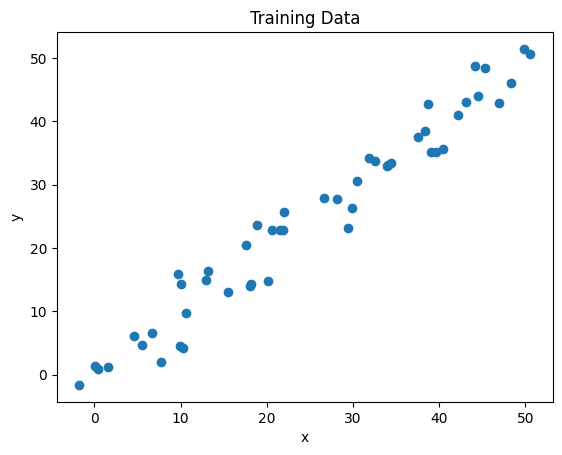

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
np.random.seed(101)
# Generating random linear data
# There will be 50 data points ranging from 0 to 50
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)

# Adding noise to the random linear data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

n = len(x) # Number of data points
# Plot of Training Data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()


In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")
learning_rate = 0.01
training_epochs = 1000
# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)

# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)

# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Global Variables Initializer
init = tf.global_variables_initializer()
# Starting the Tensorflow Session
with tf.Session() as sess:

	# Initializing the Variables
	sess.run(init)

	# Iterating through all the epochs
	for epoch in range(training_epochs):

		# Feeding each data point into the optimizer using Feed Dictionary
		for (_x, _y) in zip(x, y):
			sess.run(optimizer, feed_dict = {X : _x, Y : _y})

		# Displaying the result after every 50 epochs
		if (epoch + 1) % 50 == 0:
			# Calculating the cost a every epoch
			c = sess.run(cost, feed_dict = {X : x, Y : y})
			print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))

	# Storing necessary values to be used outside the Session
	training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
	weight = sess.run(W)
	bias = sess.run(b)


Instructions for updating:
non-resource variables are not supported in the long term


Epoch 50 : cost = 5.8868036 W = 0.9951241 b = 1.238105
Epoch 100 : cost = 5.79127 W = 0.99812365 b = 1.0914395
Epoch 150 : cost = 5.7119684 W = 1.0008028 b = 0.96044284
Epoch 200 : cost = 5.6459413 W = 1.0031956 b = 0.84343934
Epoch 250 : cost = 5.5907993 W = 1.0053328 b = 0.7389355
Epoch 300 : cost = 5.544608 W = 1.007242 b = 0.6455921
Epoch 350 : cost = 5.5057893 W = 1.008947 b = 0.56221986
Epoch 400 : cost = 5.473066 W = 1.01047 b = 0.48775342
Epoch 450 : cost = 5.445385 W = 1.0118302 b = 0.42124158
Epoch 500 : cost = 5.4219036 W = 1.0130452 b = 0.36183482
Epoch 550 : cost = 5.4019227 W = 1.0141305 b = 0.30877408
Epoch 600 : cost = 5.3848557 W = 1.0150996 b = 0.2613811
Epoch 650 : cost = 5.370246 W = 1.0159653 b = 0.21905078
Epoch 700 : cost = 5.3576994 W = 1.0167387 b = 0.18124203
Epoch 750 : cost = 5.3468933 W = 1.0174294 b = 0.14747237
Epoch 800 : cost = 5.337558 W = 1.0180461 b = 0.11730931
Epoch 850 : cost = 5.3294754 W = 1.0185971 b = 0.090368524
Epoch 900 : cost = 5.322459 W 

In [ ]:
# Calculating the predictions
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')


Training cost = 5.3110332 Weight = 1.0199214 bias = 0.02561658 



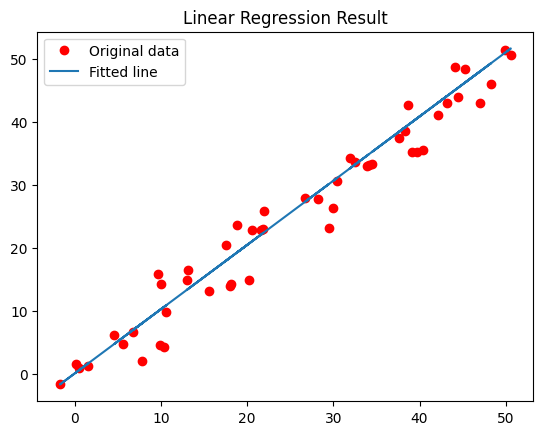

In [ ]:
# Plotting the Results
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()


#Hyperparameter tuning

###1. GridSearchCV

In [ ]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.datasets import make_classification


X, y = make_classification(
	n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiating logistic regression classifier
logreg = LogisticRegression()

# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Assuming X and y are your feature matrix and target variable
# Fit the GridSearchCV object to the data
logreg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.006105402296585327}
Best score is 0.853


###2. RandomizedSearchCV

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Generate a synthetic dataset for illustration
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Rest of your code (including the RandomizedSearchCV part)
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
	"max_depth": [3, None],
	"max_features": randint(1, 9),
	"min_samples_leaf": randint(1, 9),
	"criterion": ["gini", "entropy"]
}

tree = DecisionTreeClassifier()
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv.fit(X, y)

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))


Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 5}
Best score is 0.834


#Introduction to Convolution Neural Network


#Example1

Step:

*   import the necessary libraries

*  set the parameter
*  define the kernel


*  Load the image and plot it


*   Reformat the image
*  Apply convolution layer operation and plot the output image.
*   Apply activation layer operation and plot the output image.
* Apply pooling layer operation and plot the output image.


In [ ]:
# import the necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from itertools import product

In [ ]:
# set the param
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

In [ ]:
# define the kernel
kernel = tf.constant([[-1, -1, -1],
					[-1, 8, -1],
					[-1, -1, -1],
				])

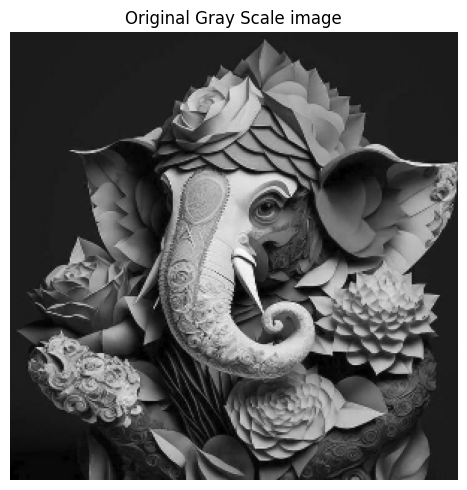

In [ ]:
# load the image
image = tf.io.read_file('/content/Ganesh.jpg')
image = tf.io.decode_jpeg(image, channels=1)
image = tf.image.resize(image, size=[300, 300])

# plot the image
img = tf.squeeze(image).numpy()
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show();


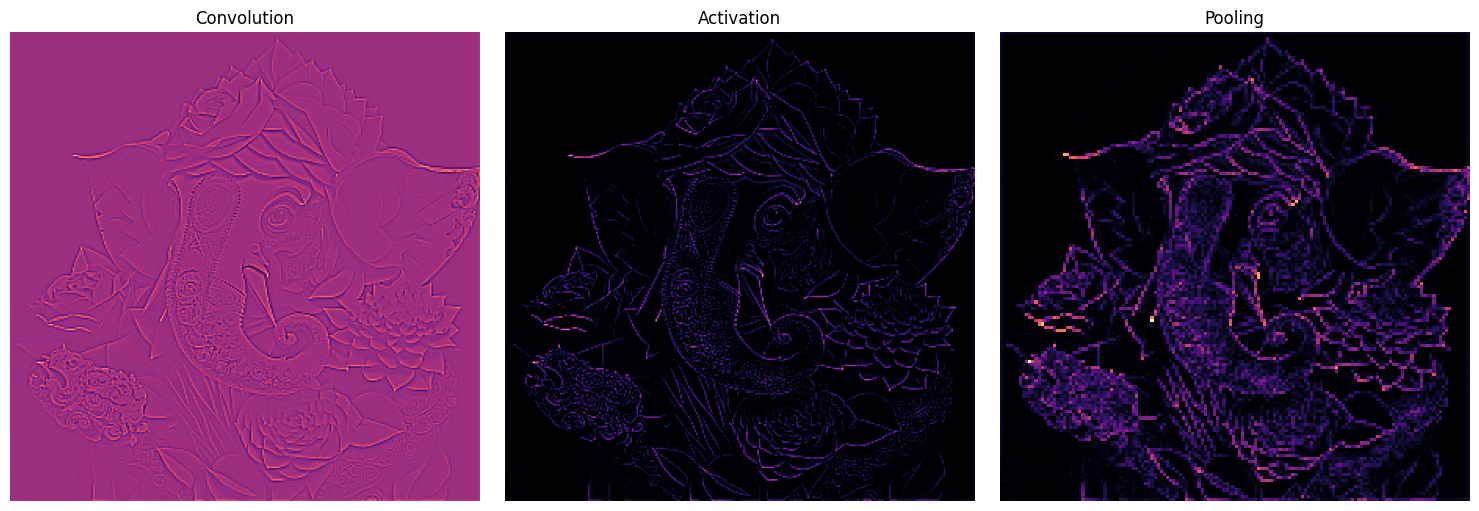

In [ ]:
# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)
# convolution layer
conv_fn = tf.nn.conv2d

image_filter = conv_fn(
	input=image,
	filters=kernel,
	strides=1, # or (1, 1)
	padding='SAME',
)

plt.figure(figsize=(15, 5))

# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
	tf.squeeze(image_filter)
)
plt.axis('off')
plt.title('Convolution')

# activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
	# Reformat for plotting
	tf.squeeze(image_detect)
)

plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(input=image_detect,
							window_shape=(2, 2),
							pooling_type='MAX',
							strides=(2, 2),
							padding='SAME',
							)

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()


#CNN | Introduction to Pooling Layer





#Code #1 : Performing Max Pooling using keras

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import MaxPooling2D

# define input image
image = np.array([[2, 2, 7, 3],
				[9, 4, 6, 1],
				[8, 5, 2, 4],
				[3, 1, 2, 6]])
image = image.reshape(1, 4, 4, 1)

# define model containing just a single max pooling layer
model = Sequential(
	[MaxPooling2D(pool_size = 2, strides = 2)])

# generate pooled output
output = model.predict(image)

# print output image
output = np.squeeze(output)
print(output)


1/1 [==============================] - 0s 139ms/step
[[9 7]
 [8 6]]


#Code #2 : Performing Average Pooling using keras

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import AveragePooling2D

# Define input image (converted to float type)
image = np.array([[2, 2, 7, 3],
                [9, 4, 6, 1],
                [8, 5, 2, 4],
                [3, 1, 2, 6]], dtype=np.float32)  # Convert to float32
image = image.reshape(1, 4, 4, 1)

# Define model with a single AveragePooling2D layer
model = Sequential([AveragePooling2D(pool_size=2, strides=2)])

# Generate pooled output
output = model.predict(image)

# Print output image
output = np.squeeze(output)
print(output)


1/1 [==============================] - 0s 36ms/step
[[4.25 4.25]
 [4.25 3.5 ]]


#Code #3 : Performing Global Pooling using keras

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D

# define input image
image = np.array([[2, 2, 7, 3],
				[9, 4, 6, 1],
				[8, 5, 2, 4],
				[3, 1, 2, 6]])
image = image.reshape(1, 4, 4, 1)

# define gm_model containing just a single global-max pooling layer
gm_model = Sequential(
	[GlobalMaxPooling2D()])

# define ga_model containing just a single global-average pooling layer
ga_model = Sequential(
	[GlobalAveragePooling2D()])

# generate pooled output
gm_output = gm_model.predict(image)
ga_output = ga_model.predict(image)

# print output image
gm_output = np.squeeze(gm_output)
ga_output = np.squeeze(ga_output)
print("gm_output: ", gm_output)
print("ga_output: ", ga_output)


1/1 [==============================] - 0s 43ms/step
gm_output:  9
ga_output:  4


#**CIFAR-10 Image Classification in TensorFlow**



#Prerequisites:


*   Image Classification
*  Convolution Neural Networks
*  Data Augmentation
*  Neural Networks
*   Numpy arrays





In this notebook, we are going to discuss how to classify images using TensorFlow and CIFAR-10 Dataset.
There is a total of 60000 images of 10 different classes naming Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck. All the images are of size 32×32. There are in total 50000 train images and 10000 test images.


#Import librairies

In [ ]:
import tensorflow as tf

# Display the version
print(tf.__version__)

# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model


2.15.0


#Load the dataset

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


#Process the data

In [ ]:
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()


#Visualize Data

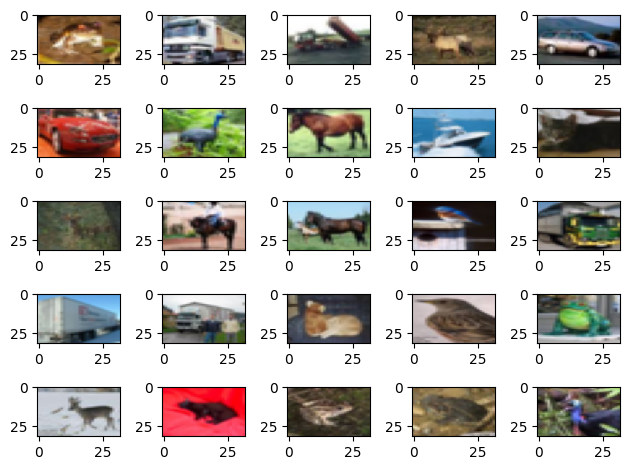

In [ ]:
# visualize data by plotting images
fig, ax = plt.subplots(5, 5)
k = 0

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(x_train[k], aspect='auto')
		k += 1

plt.show()


#Build CNN model

In [ ]:
# number of classes
K = len(set(y_train))

# calculate total number of classes
# for output layer
print("number of classes:", K)

# Build the model using the functional API
# input layer
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.2)(x)

# Hidden layer
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)

# last hidden layer i.e.. output layer
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# model description
model.summary()


number of classes: 10
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16,

#Compile model


In [ ]:
# Compile
model.compile(optimizer='adam',
			loss='sparse_categorical_crossentropy',
			metrics=['accuracy'])


#Train model

In [ ]:
# Fit
r = model.fit(
x_train, y_train, validation_data=(x_test, y_test), epochs=20)


Epoch 1/20
1563/1563 [==============================] - 316s 202ms/step - loss: 1.2150 - accuracy: 0.5689 - val_loss: 1.0309 - val_accuracy: 0.6434
Epoch 2/20
1563/1563 [==============================] - 312s 199ms/step - loss: 0.8273 - accuracy: 0.7129 - val_loss: 0.9449 - val_accuracy: 0.6816
Epoch 3/20
1563/1563 [==============================] - 302s 193ms/step - loss: 0.6864 - accuracy: 0.7630 - val_loss: 1.0992 - val_accuracy: 0.6580
Epoch 4/20
1563/1563 [==============================] - 300s 192ms/step - loss: 0.5758 - accuracy: 0.8044 - val_loss: 0.7465 - val_accuracy: 0.7551
Epoch 5/20
1563/1563 [==============================] - 295s 189ms/step - loss: 0.4926 - accuracy: 0.8306 - val_loss: 0.6930 - val_accuracy: 0.7776
Epoch 6/20
1563/1563 [==============================] - 288s 184ms/step - loss: 0.4174 - accuracy: 0.8553 - val_loss: 0.7539 - val_accuracy: 0.7758
Epoch 7/20
1563/1563 [==============================] - 289s 185ms/step - loss: 0.3546 - accuracy: 0.8796 - val_

#Data augmentation and retrain model

In [ ]:
# Fit with data augmentation
# Note: if you run this AFTER calling
# the previous model.fit()
# it will CONTINUE training where it left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size

r = model.fit(train_generator, validation_data=(x_test, y_test),
			steps_per_epoch=steps_per_epoch, epochs=20)


Epoch 1/20
1562/1562 [==============================] - 309s 198ms/step - loss: 0.5670 - accuracy: 0.8176 - val_loss: 0.5756 - val_accuracy: 0.8172
Epoch 2/20
1562/1562 [==============================] - 308s 197ms/step - loss: 0.4780 - accuracy: 0.8419 - val_loss: 0.5403 - val_accuracy: 0.8252
Epoch 3/20
1562/1562 [==============================] - 311s 199ms/step - loss: 0.4335 - accuracy: 0.8537 - val_loss: 0.4947 - val_accuracy: 0.8380
Epoch 4/20
1562/1562 [==============================] - 310s 199ms/step - loss: 0.4084 - accuracy: 0.8618 - val_loss: 0.4641 - val_accuracy: 0.8464
Epoch 5/20
1562/1562 [==============================] - 304s 195ms/step - loss: 0.3886 - accuracy: 0.8706 - val_loss: 0.4592 - val_accuracy: 0.8499
Epoch 6/20
1562/1562 [==============================] - 303s 194ms/step - loss: 0.3733 - accuracy: 0.8732 - val_loss: 0.4510 - val_accuracy: 0.8528
Epoch 7/20
1562/1562 [==============================] - 303s 194ms/step - loss: 0.3590 - accuracy: 0.8780 - val_

#Plot accuracy per iteration

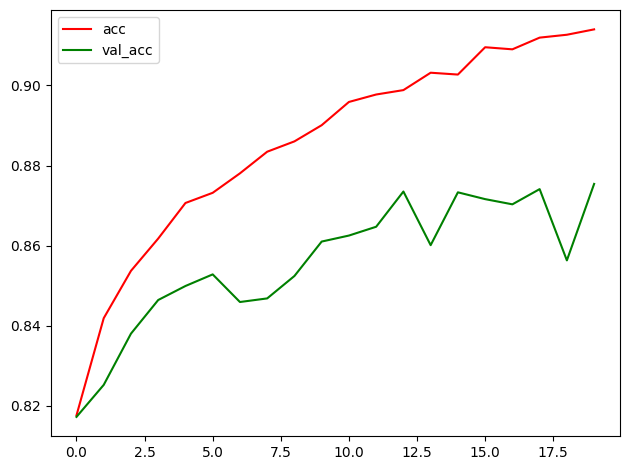

In [ ]:
plt.plot(r.history['accuracy'], label='acc', color='red')
plt.plot(r.history['val_accuracy'], label='val_acc', color='green')
plt.legend()


#Make predictions

1/1 [==============================] - 0s 140ms/step
Original label is cat and predicted label is cat


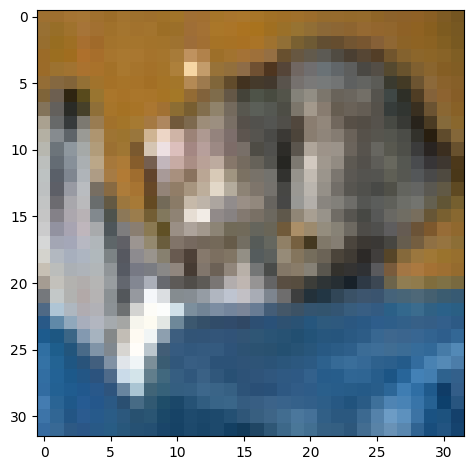

In [ ]:
# label mapping

labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 0

# display the image
plt.imshow(x_test[image_number])

# load the image in an array
n = np.array(x_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
	original_label, predicted_label))


#Save model

In [ ]:
# save the model
model.save('geeksforgeeks.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


#Implementation of a CNN based Image Classifier using PyTorch

#Installation

For the implementation of the CNN and downloading the CIFAR-10 dataset, we’ll be requiring the torch and torchvision modules.

In [ ]:
pip install torch torchvision torchaudio numpy matplotlib

#Stepwise implementation

#Step 1: Downloading data and printing some sample images from the training set.

Files already downloaded and verified
Files already downloaded and verified


(-0.5, 165.5, 165.5, -0.5)

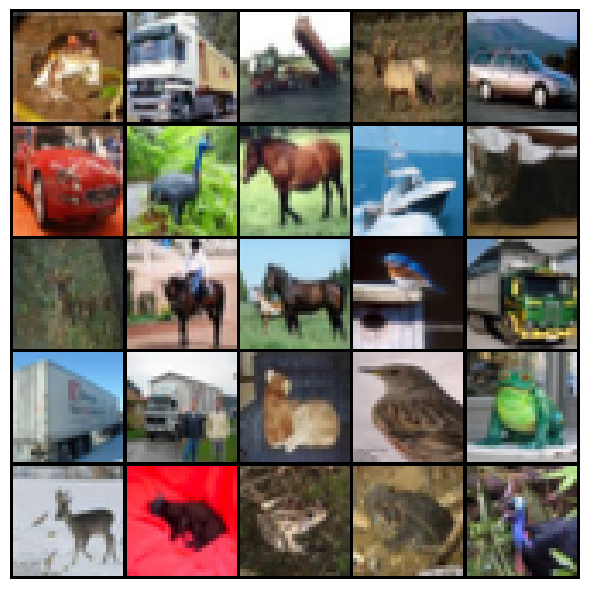

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# The below two lines are optional and are just there to avoid any SSL
# related errors while downloading the CIFAR-10 dataset
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

#Defining plotting settings
plt.rcParams['figure.figsize'] = 14, 6

#Initializing normalizing transform for the dataset
normalize_transform = torchvision.transforms.Compose([
	torchvision.transforms.ToTensor(),
	torchvision.transforms.Normalize(mean = (0.5, 0.5, 0.5),
									std = (0.5, 0.5, 0.5))])

#Downloading the CIFAR10 dataset into train and test sets
train_dataset = torchvision.datasets.CIFAR10(
	root="./CIFAR10/train", train=True,
	transform=normalize_transform,
	download=True)

test_dataset = torchvision.datasets.CIFAR10(
	root="./CIFAR10/test", train=False,
	transform=normalize_transform,
	download=True)

#Generating data loaders from the corresponding datasets
batch_size = 128
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

#Plotting 25 images from the 1st batch
dataiter = iter(train_loader)
images, labels = next(dataiter)
plt.imshow(np.transpose(torchvision.utils.make_grid(images[:25], normalize=True, padding=1, nrow=5).numpy(), (1, 2, 0)))
plt.axis('off')


#Step-2: Plotting class distribution of the dataset

This helps in checking whether the provided dataset is balanced or not


Text(0, 0.5, 'Number of training instances')

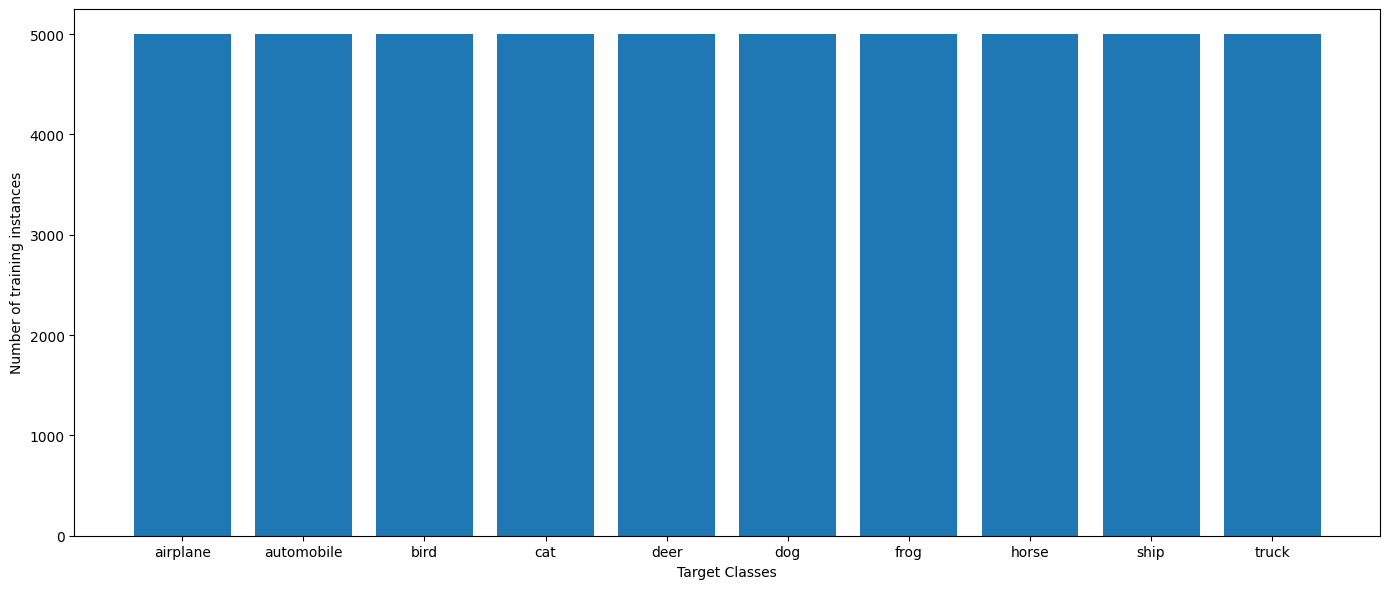

In [ ]:
#Iterating over the training dataset and storing the target class for each sample
classes = []
for batch_idx, data in enumerate(train_loader, 0):
	x, y = data
	classes.extend(y.tolist())

#Calculating the unique classes and the respective counts and plotting them
unique, counts = np.unique(classes, return_counts=True)
names = list(test_dataset.class_to_idx.keys())
plt.bar(names, counts)
plt.xlabel("Target Classes")
plt.ylabel("Number of training instances")


As shown in Figure, each of the ten classes has almost the same number of training samples. Thus we don’t need to take additional steps to rebalance the dataset.

#Step-3: Implementing the CNN architecture

In [ ]:
class CNN(torch.nn.Module):
	def __init__(self):
		super().__init__()
		self.model = torch.nn.Sequential(
			#Input = 3 x 32 x 32, Output = 32 x 32 x 32
			torch.nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1),
			torch.nn.ReLU(),
			#Input = 32 x 32 x 32, Output = 32 x 16 x 16
			torch.nn.MaxPool2d(kernel_size=2),

			#Input = 32 x 16 x 16, Output = 64 x 16 x 16
			torch.nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1),
			torch.nn.ReLU(),
			#Input = 64 x 16 x 16, Output = 64 x 8 x 8
			torch.nn.MaxPool2d(kernel_size=2),

			#Input = 64 x 8 x 8, Output = 64 x 8 x 8
			torch.nn.Conv2d(in_channels = 64, out_channels = 64, kernel_size = 3, padding = 1),
			torch.nn.ReLU(),
			#Input = 64 x 8 x 8, Output = 64 x 4 x 4
			torch.nn.MaxPool2d(kernel_size=2),

			torch.nn.Flatten(),
			torch.nn.Linear(64*4*4, 512),
			torch.nn.ReLU(),
			torch.nn.Linear(512, 10)
		)

	def forward(self, x):
		return self.model(x)


#Step-4: Defining the training parameters and beginning the training process



*   20 epochs
*   Cross-Entropy Loss

*   Adam optimizer
*   learning rate of 0.001





Epoch 1/20: Training loss = 1.6627479712371631
Epoch 2/20: Training loss = 1.3650011293723454
Epoch 3/20: Training loss = 1.2483786894842182
Epoch 4/20: Training loss = 1.17493358780356
Epoch 5/20: Training loss = 1.1194833085665008
Epoch 6/20: Training loss = 1.074779587176145
Epoch 7/20: Training loss = 1.0387109130849619
Epoch 8/20: Training loss = 1.0082833119060681
Epoch 9/20: Training loss = 0.9835612330290363
Epoch 10/20: Training loss = 0.9606748817826781
Epoch 11/20: Training loss = 0.9415830332604821
Epoch 12/20: Training loss = 0.9253123134298398
Epoch 13/20: Training loss = 0.9110464537540055
Epoch 14/20: Training loss = 0.8988047798576257
Epoch 15/20: Training loss = 0.8889678785258242
Epoch 16/20: Training loss = 0.8796593943215392
Epoch 17/20: Training loss = 0.8723011573257349
Epoch 18/20: Training loss = 0.8643731075479552
Epoch 19/20: Training loss = 0.8583016134893803
Epoch 20/20: Training loss = 0.8515104591998908


Text(0, 0.5, 'Training loss')

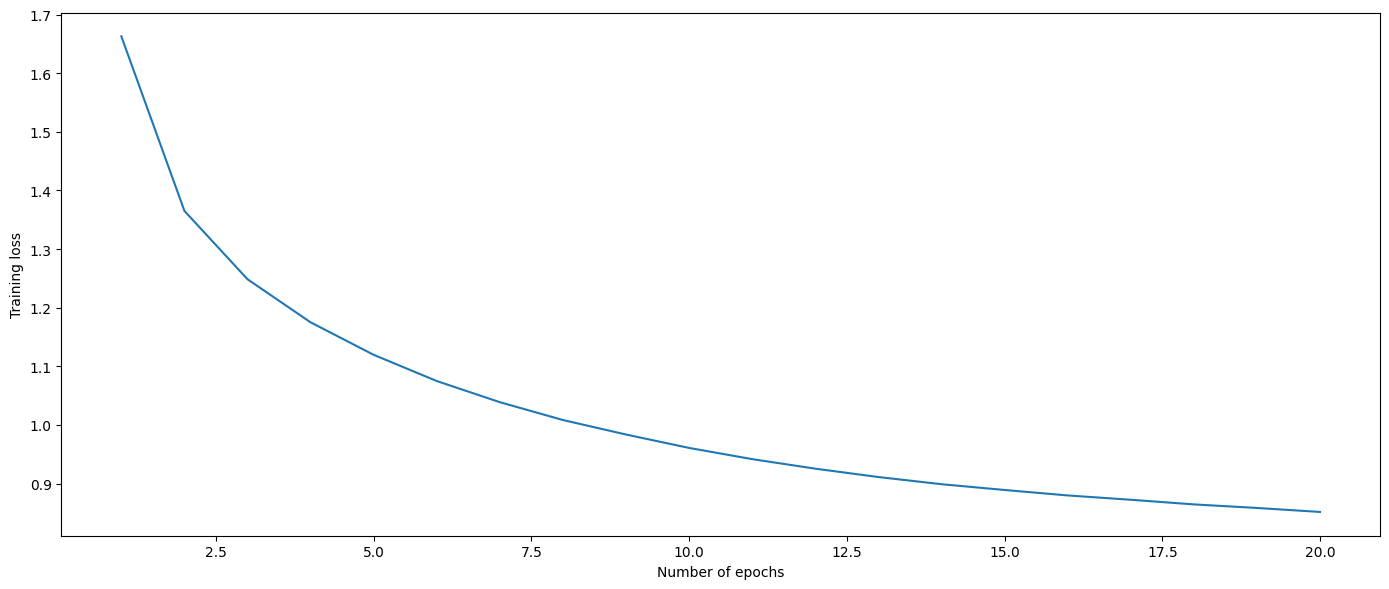

In [ ]:
#Selecting the appropriate training device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CNN().to(device)

#Defining the model hyper parameters
num_epochs = 20
learning_rate = 0.001
weight_decay = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

#Training process begins
train_loss_list = []
for epoch in range(num_epochs):
	print(f'Epoch {epoch+1}/{num_epochs}:', end = ' ')
	train_loss = 0

	#Iterating over the training dataset in batches
	model.train()
	for i, (images, labels) in enumerate(train_loader):

		#Extracting images and target labels for the batch being iterated
		images = images.to(device)
		labels = labels.to(device)

		#Calculating the model output and the cross entropy loss
		outputs = model(images)
		loss = criterion(outputs, labels)

		#Updating weights according to calculated loss
		optimizer.zero_grad()
		loss.backward()
		optimizer.step()
		train_loss += loss.item()

	#Printing loss for each epoch
	train_loss_list.append(train_loss/len(train_loader))
	print(f"Training loss = {train_loss_list[-1]}")

#Plotting loss for all epochs
plt.plot(range(1,num_epochs+1), train_loss_list)
plt.xlabel("Number of epochs")
plt.ylabel("Training loss")


From Figure , we can see that the loss decreases as the epochs increase, indicating a successful training procedure.

#Step-5: Calculating the model’s accuracy on the test set

Now that our model’s trained, we need to check its performance on the test set. To do that, we iterate over the entire test set in batches and calculate the accuracy score by comparing the true and predicted labels for each batch.

In [ ]:
test_acc=0
model.eval()

with torch.no_grad():
	#Iterating over the training dataset in batches
	for i, (images, labels) in enumerate(test_loader):

		images = images.to(device)
		y_true = labels.to(device)

		#Calculating outputs for the batch being iterated
		outputs = model(images)

		#Calculated prediction labels from models
		_, y_pred = torch.max(outputs.data, 1)

		#Comparing predicted and true labels
		test_acc += (y_pred == y_true).sum().item()

	print(f"Test set accuracy = {100 * test_acc / len(test_dataset)} %")


Test set accuracy = 69.37 %


#Step 6: Generating predictions for sample images in the test set



To validate its performance, we can generate some predictions for some sample images. To do that, we take the first five images of the last batch of the test set and plot them using the make_grid utility from torchvision. We then collect their true labels and predictions from the model and show them in the plot’s title.

(-0.5, 165.5, 33.5, -0.5)

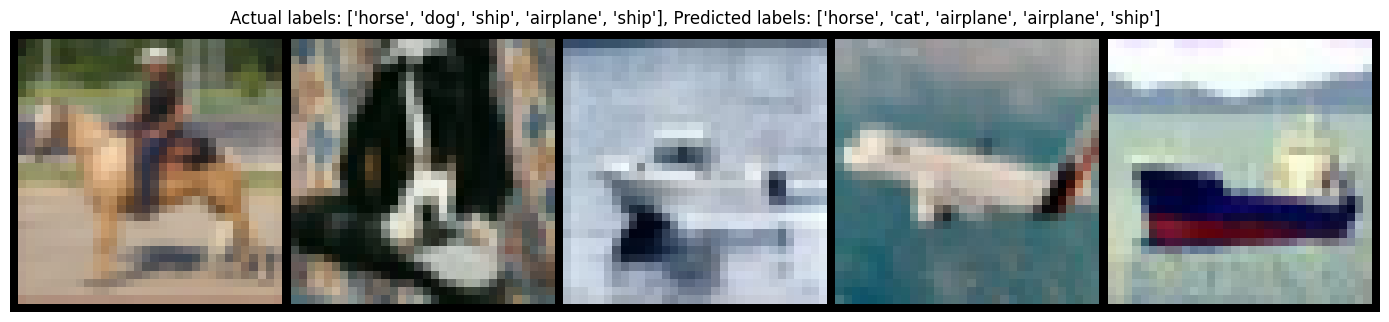

In [ ]:
#Generating predictions for 'num_images' amount of images from the last batch of test set
num_images = 5
y_true_name = [names[y_true[idx]] for idx in range(num_images)]
y_pred_name = [names[y_pred[idx]] for idx in range(num_images)]

#Generating the title for the plot
title = f"Actual labels: {y_true_name}, Predicted labels: {y_pred_name}"

#Finally plotting the images with their actual and predicted labels in the title
plt.imshow(np.transpose(torchvision.utils.make_grid(images[:num_images].cpu(), normalize=True, padding=1).numpy(), (1, 2, 0)))
plt.title(title)
plt.axis("off")


#Conclusion:

This notebook covered the PyTorch implementation of a simple CNN on the popular CIFAR-10 dataset.

#Example Model of LeNet-5

In [ ]:
import torch
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F

class LeNet5(nn.Module):
	def __init__(self):
		# Call the parent class's init method
		super(LeNet5, self).__init__()

		# First Convolutional Layer
		self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)

		# Max Pooling Layer
		self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

		# Second Convolutional Layer
		self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)

		# First Fully Connected Layer
		self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)

		# Second Fully Connected Layer
		self.fc2 = nn.Linear(in_features=120, out_features=84)

		# Output Layer
		self.fc3 = nn.Linear(in_features=84, out_features=10)

	def forward(self, x):
		# Pass the input through the first convolutional layer and activation function
		x = self.pool(F.relu(self.conv1(x)))

		# Pass the output of the first layer through
		# the second convolutional layer and activation function
		x = self.pool(F.relu(self.conv2(x)))

		# Reshape the output to be passed through the fully connected layers
		x = x.view(-1, 16 * 5 * 5)

		# Pass the output through the first fully connected layer and activation function
		x = F.relu(self.fc1(x))

		# Pass the output of the first fully connected layer through
		# the second fully connected layer and activation function
		x = F.relu(self.fc2(x))

		# Pass the output of the second fully connected layer through the output layer
		x = self.fc3(x)

		# Return the final output
		return x

lenet5 = LeNet5()
print(lenet5)


LeNet5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


#Model Summary :
Print the summary of the lenet5  to check the params

In [ ]:
# add the cuda to the mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lenet5.to(device)

#Print the summary of the model
summary(lenet5, (1, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
         MaxPool2d-2            [-1, 6, 14, 14]               0
            Conv2d-3           [-1, 16, 10, 10]           2,416
         MaxPool2d-4             [-1, 16, 5, 5]               0
            Linear-5                  [-1, 120]          48,120
            Linear-6                   [-1, 84]          10,164
            Linear-7                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.06
Params size (MB): 0.24
Estimated Total Size (MB): 0.30
----------------------------------------------------------------


#Example Model of AlexNNet

In [ ]:
import torch
from torchsummary import summary
import torch.nn as nn
import torch.nn.functional as F

class AlexNet(nn.Module):
	def __init__(self, num_classes=1000):
		# Call the parent class's init method to initialize the base class
		super(AlexNet, self).__init__()

		# First Convolutional Layer with 11x11 filters, stride of 4, and 2 padding
		self.conv1 = nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=2)

		# Max Pooling Layer with a kernel size of 3 and stride of 2
		self.pool = nn.MaxPool2d(kernel_size=3, stride=2)

		# Second Convolutional Layer with 5x5 filters and 2 padding
		self.conv2 = nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, padding=2)

		# Third Convolutional Layer with 3x3 filters and 1 padding
		self.conv3 = nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, padding=1)

		# Fourth Convolutional Layer with 3x3 filters and 1 padding
		self.conv4 = nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, padding=1)

		# Fifth Convolutional Layer with 3x3 filters and 1 padding
		self.conv5 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1)

		# First Fully Connected Layer with 4096 output features
		self.fc1 = nn.Linear(in_features=256 * 6 * 6, out_features=4096)

		# Second Fully Connected Layer with 4096 output features
		self.fc2 = nn.Linear(in_features=4096, out_features=4096)

		# Output Layer with `num_classes` output features
		self.fc3 = nn.Linear(in_features=4096, out_features=num_classes)

	def forward(self, x):
		# Pass the input through the first convolutional layer and ReLU activation function
		x = self.pool(F.relu(self.conv1(x)))

		# Pass the output of the first layer through
		# the second convolutional layer and ReLU activation function
		x = self.pool(F.relu(self.conv2(x)))

		# Pass the output of the second layer through
		# the third convolutional layer and ReLU activation function
		x = F.relu(self.conv3(x))

		# Pass the output of the third layer through
		# the fourth convolutional layer and ReLU activation function
		x = F.relu(self.conv4(x))

		# Pass the output of the fourth layer through
		# the fifth convolutional layer and ReLU activation function
		x = self.pool(F.relu(self.conv5(x)))

		# Reshape the output to be passed through the fully connected layers
		x = x.view(-1, 256 * 6 * 6)

		# Pass the output through the first fully connected layer and activation function
		x = F.relu(self.fc1(x))
		x = F.dropout(x, 0.5)

		# Pass the output of the first fully connected layer through
		# the second fully connected layer and activation function
		x = F.relu(self.fc2(x))

		# Pass the output of the second fully connected layer through the output layer
		x = self.fc3(x)

		# Return the final output
		return x


alexnet = AlexNet()
print(alexnet)


AlexNet(
  (conv1): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv3): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=9216, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=4096, bias=True)
  (fc3): Linear(in_features=4096, out_features=1000, bias=True)
)


#Model Summary :

Print the summary of the alexnet to check the params


In [ ]:
# add the cuda to the mode
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
alexnet.to(device)

#Print the summary of the model
summary(alexnet, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
         MaxPool2d-2           [-1, 96, 27, 27]               0
            Conv2d-3          [-1, 256, 27, 27]         614,656
         MaxPool2d-4          [-1, 256, 13, 13]               0
            Conv2d-5          [-1, 384, 13, 13]         885,120
            Conv2d-6          [-1, 384, 13, 13]       1,327,488
            Conv2d-7          [-1, 256, 13, 13]         884,992
         MaxPool2d-8            [-1, 256, 6, 6]               0
            Linear-9                 [-1, 4096]      37,752,832
           Linear-10                 [-1, 4096]      16,781,312
           Linear-11                 [-1, 1000]       4,097,000
Total params: 62,378,344
Trainable params: 62,378,344
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.57
Fo

#Natural Language Toolkit (NLTK)

In [ ]:
import nltk
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

#Tokenization

In [ ]:
# Tokenization using NLTK
from nltk import word_tokenize, sent_tokenize
sent = "GeeksforGeeks is a great learning platform.\
It is one of the best for Computer Science students."
print(word_tokenize(sent))
print(sent_tokenize(sent))


['GeeksforGeeks', 'is', 'a', 'great', 'learning', 'platform.It', 'is', 'one', 'of', 'the', 'best', 'for', 'Computer', 'Science', 'students', '.']
['GeeksforGeeks is a great learning platform.It is one of the best for Computer Science students.']


#Stemming and Lemmatization

In [ ]:
from nltk.stem import PorterStemmer

# create an object of class PorterStemmer
porter = PorterStemmer()
print(porter.stem("play"))
print(porter.stem("playing"))
print(porter.stem("plays"))
print(porter.stem("played"))


play
play
play
play


In [ ]:
from nltk.stem import PorterStemmer
# create an object of class PorterStemmer
porter = PorterStemmer()
print(porter.stem("Communication"))


commun


The stemmer reduces the word ‘communication’ to a base word ‘commun’ which is meaningless in itself.

#Lemmatization

In [ ]:
from nltk.stem import WordNetLemmatizer
# create an object of class WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("plays", 'v'))
print(lemmatizer.lemmatize("played", 'v'))
print(lemmatizer.lemmatize("play", 'v'))
print(lemmatizer.lemmatize("playing", 'v'))


play
play
play
play


In [ ]:
from nltk.stem import WordNetLemmatizer

# create an object of class WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
print(lemmatizer.lemmatize("Communication", 'v'))


Communication


Please note that in lemmatizers, we need to pass the Part of Speech of the word along with the word as a function argument.

#Part of Speech Tagging

In [ ]:
from nltk import pos_tag
from nltk import word_tokenize

text = "GeeksforGeeks is a Computer Science platform."
tokenized_text = word_tokenize(text)
tags = tokens_tag = pos_tag(tokenized_text)
print(tags)


[('GeeksforGeeks', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('Computer', 'NNP'), ('Science', 'NNP'), ('platform', 'NN'), ('.', '.')]


#RNN Code Implementation






#Imported libraries:



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


#Generated some example data using text.

In [ ]:
text = "This is GeeksforGeeks a software training institute"
chars = sorted(list(set(text)))
char_to_index = {char: i for i, char in enumerate(chars)}
index_to_char = {i: char for i, char in enumerate(chars)}


Created input sequences and corresponding labels for further implementation.

In [ ]:
seq_length = 3
sequences = []
labels = []

for i in range(len(text) - seq_length):
	seq = text[i:i+seq_length]
	label = text[i+seq_length]
	sequences.append([char_to_index[char] for char in seq])
	labels.append(char_to_index[label])


Converted sequences and labels into numpy arrays and used one-hot encoding to convert text into vector.

In [ ]:
X = np.array(sequences)
y = np.array(labels)

X_one_hot = tf.one_hot(X, len(chars))
y_one_hot = tf.one_hot(y, len(chars))


#Model Building:

Build RNN Model using ‘relu’ and ‘softmax‘ activation function.

In [ ]:
model = Sequential()
model.add(SimpleRNN(50, input_shape=(seq_length, len(chars)), activation='relu'))
model.add(Dense(len(chars), activation='softmax'))


#Model Compilation:

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


#Model Training:

In [ ]:
model.fit(X_one_hot, y_one_hot, epochs=100)


Epoch 1/100
2/2 [==============================] - 1s 12ms/step - loss: 2.8400 - accuracy: 0.0625
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 2.8184 - accuracy: 0.0833
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 2.8017 - accuracy: 0.0833
Epoch 4/100
2/2 [==============================] - 0s 9ms/step - loss: 2.7851 - accuracy: 0.1458
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 2.7698 - accuracy: 0.2083
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 2.7539 - accuracy: 0.2083
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 2.7380 - accuracy: 0.2083
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 2.7226 - accuracy: 0.2292
Epoch 9/100
2/2 [==============================] - 0s 12ms/step - loss: 2.7074 - accuracy: 0.2292
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 2.6920 - accuracy: 0.2500
Epoch 11/100
2/2 [========

#Model Prediction:

In [ ]:
start_seq = "This is G"
generated_text = start_seq

for i in range(50):
	x = np.array([[char_to_index[char] for char in generated_text[-seq_length:]]])
	x_one_hot = tf.one_hot(x, len(chars))
	prediction = model.predict(x_one_hot)
	next_index = np.argmax(prediction)
	next_char = index_to_char[next_index]
	generated_text += next_char

print("Generated Text:")
print(generated_text)


1/1 [==============================] - 0s 19ms/step
Generated Text:
This is Geeks a software training instituteeessftraining in


#Sentiment Analysis with an Recurrent Neural Networks (RNN)

We will conduct Sentiment Analysis to understand text classification using Tensorflow!

Importing Libraries and Dataset

In [ ]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
import numpy as np


We will be using Keras IMDB dataset. vocabulary size is a parameter that is used the get data containing the given number of most occurring words in the entire corpus of textual data.

In [ ]:
# Getting reviews with words that come under 5000
# most occurring words in the entire
# corpus of textual review data
vocab_size = 5000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

print(x_train[0])


17464789/17464789 [==============================] - 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
# Getting all the words from word_index dictionary
word_idx = imdb.get_word_index()

# Originally the index number of a value and not a key,
# hence converting the index as key and the words as values
word_idx = {i: word for word, i in word_idx.items()}

# again printing the review
print([word_idx[i] for i in x_train[0]])


1641221/1641221 [==============================] - 0s 0us/step
['the', 'as', 'you', 'with', 'out', 'themselves', 'powerful', 'lets', 'loves', 'their', 'becomes', 'reaching', 'had', 'journalist', 'of', 'lot', 'from', 'anyone', 'to', 'have', 'after', 'out', 'atmosphere', 'never', 'more', 'room', 'and', 'it', 'so', 'heart', 'shows', 'to', 'years', 'of', 'every', 'never', 'going', 'and', 'help', 'moments', 'or', 'of', 'every', 'chest', 'visual', 'movie', 'except', 'her', 'was', 'several', 'of', 'enough', 'more', 'with', 'is', 'now', 'current', 'film', 'as', 'you', 'of', 'mine', 'potentially', 'unfortunately', 'of', 'you', 'than', 'him', 'that', 'with', 'out', 'themselves', 'her', 'get', 'for', 'was', 'camp', 'of', 'you', 'movie', 'sometimes', 'movie', 'that', 'with', 'scary', 'but', 'and', 'to', 'story', 'wonderful', 'that', 'in', 'seeing', 'in', 'character', 'to', 'of', '70s', 'and', 'with', 'heart', 'had', 'shadows', 'they', 'of', 'here', 'that', 'with', 'her', 'serious', 'to', 'have', '

Let’s check the range of the reviews we have in this dataset.

In [ ]:
# Get the minimum and the maximum length of reviews
print("Max length of a review:: ", len(max((x_train+x_test), key=len)))
print("Min length of a review:: ", len(min((x_train+x_test), key=len)))


Max length of a review::  2697
Min length of a review::  70


We see that the longest review available is 2697 words and the shortest one is 70. While working with Neural Networks, it is important to make all the inputs in a fixed size. To achieve this objective we will pad the review sentences.

In [ ]:
from tensorflow.keras.preprocessing import sequence

# Keeping a fixed length of all reviews to max 400 words
max_words = 400

x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_test = sequence.pad_sequences(x_test, maxlen=max_words)

x_valid, y_valid = x_train[:64], y_train[:64]
x_train_, y_train_ = x_train[64:], y_train[64:]


#SimpleRNN (also called Vanilla RNN)

In [ ]:
embd_len = 32

In [ ]:
# fixing every word's embedding size to be 32
embd_len = 32

# Creating a RNN model
RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(vocab_size,
						embd_len,
						input_length=max_words))

# In case of a stacked(more than one layer of RNN)
# use return_sequences=True
RNN_model.add(SimpleRNN(128,
						activation='tanh',
						return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))

# printing model summary
print(RNN_model.summary())

# Compiling model
RNN_model.compile(
	loss="binary_crossentropy",
	optimizer='adam',
	metrics=['accuracy']
)

# Training the model
history = RNN_model.fit(x_train_, y_train_,
						batch_size=64,
						epochs=5,
						verbose=1,
						validation_data=(x_valid, y_valid))

# Printing model score on test data
print()
print("Simple_RNN Score---> ", RNN_model.evaluate(x_test, y_test, verbose=0))


Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 32)           160000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               20608     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 180737 (706.00 KB)
Trainable params: 180737 (706.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
390/390 [==============================] - 88s 217ms/step - loss: 0.6857 - accuracy: 0.5374 - val_loss: 0.6616 - val_accuracy: 0.5938
Epoch 2/5
390/390 [==============================] - 84s 217ms/step - loss: 0.5797 - accuracy: 0.6899 - val_loss: 0.6709 - val_accu

The vanilla form of RNN gave us a Test Accuracy of 64.68%. Limitations of Simple RNN are it is unable to handle long sentences well because of its vanishing gradient problems.

#Gated Recurrent Units (GRU)

GRUs are lesser know but equally robust algorithms to solve the limitations of simple RNNs

In [ ]:
# Defining GRU model
gru_model = Sequential(name="GRU_Model")
gru_model.add(Embedding(vocab_size,
						embd_len,
						input_length=max_words))
gru_model.add(GRU(128,
				activation='tanh',
				return_sequences=False))
gru_model.add(Dense(1, activation='sigmoid'))

# Printing the Summary
print(gru_model.summary())

# Compiling the model
gru_model.compile(
	loss="binary_crossentropy",
	optimizer='adam',
	metrics=['accuracy']
)

# Training the GRU model
history2 = gru_model.fit(x_train_, y_train_,
						batch_size=64,
						epochs=5,
						verbose=1,
						validation_data=(x_valid, y_valid))

# Printing model score on test data
print()
print("GRU model Score---> ", gru_model.evaluate(x_test, y_test, verbose=0))


Model: "GRU_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 400, 32)           160000    
                                                                 
 gru (GRU)                   (None, 128)               62208     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 222337 (868.50 KB)
Trainable params: 222337 (868.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
390/390 [==============================] - 261s 662ms/step - loss: 0.5580 - accuracy: 0.7047 - val_loss: 0.4881 - val_accuracy: 0.7500
Epoch 2/5
390/390 [==============================] - 258s 660ms/step - loss: 0.3426 - accuracy: 0.8567 - val_loss: 0.2433 - val_acc

Test Accuracy of GRU was found to be 88.68%. GRU is a form of RNN that are better than simple RNN and are often faster than LSTM due to its relatively fewer training parameters.



#Long Short Term Memory (LSTM)


LSTM is better in terms of capturing the memory of sequential information better than simple RNNs

In [ ]:
# Defining LSTM model
lstm_model = Sequential(name="LSTM_Model")
lstm_model.add(Embedding(vocab_size,
						embd_len,
						input_length=max_words))
lstm_model.add(LSTM(128,
					activation='relu',
					return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))

# Printing Model Summary
print(lstm_model.summary())

# Compiling the model
lstm_model.compile(
	loss="binary_crossentropy",
	optimizer='adam',
	metrics=['accuracy']
)

# Training the model
history3 = lstm_model.fit(x_train_, y_train_,
						batch_size=64,
						epochs=5,
						verbose=2,
						validation_data=(x_valid, y_valid))

# Displaying the model accuracy on test data
print()
print("LSTM model Score---> ", lstm_model.evaluate(x_test, y_test, verbose=0))


LSTM model Provided a test accuracy of 81.95%.

#Bi-directional LSTM Model

Bidirectional LSTMS are a derivative of traditional LSTMS. Here, two LSTMs are used to capture both the forward and backward sequences of the input. This helps in capturing the context better than normal LSTM

In [ ]:
# Defining Bidirectional LSTM model
bi_lstm_model = Sequential(name="Bidirectional_LSTM")
bi_lstm_model.add(Embedding(vocab_size,
							embd_len,
							input_length=max_words))
bi_lstm_model.add(Bidirectional(LSTM(128,
									activation='tanh',
									return_sequences=False)))
bi_lstm_model.add(Dense(1, activation='sigmoid'))

# Printing model summary
print(bi_lstm_model.summary())

# Compiling model summary
bi_lstm_model.compile(
loss="binary_crossentropy",
optimizer='adam',
metrics=['accuracy']
)

# Training the model
history4 = bi_lstm_model.fit(x_train_, y_train_,
							batch_size=64,
							epochs=5,
							verbose=2,
							validation_data=(x_test, y_test))

# Printing model score on test data
print()
print("Bidirectional LSTM model Score---> ",
	bi_lstm_model.evaluate(x_test, y_test, verbose=0))


Model: "Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 400, 32)           160000    
                                                                 
 bidirectional (Bidirection  (None, 256)               164864    
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 325121 (1.24 MB)
Trainable params: 325121 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
390/390 - 61s - loss: 0.5253 - accuracy: 0.7346 - val_loss: 0.4059 - val_accuracy: 0.8338 - 61s/epoch - 155ms/step
Epoch 2/5
390/390 - 28s - loss: 0.3334 - accuracy: 0.8652 - val_loss: 0.3368 - v

Bidirectional LSTM gave a test score of 87.41%.

#Conclusion

Out of all the models, for the given dataset of IMDB reviews, the GRU model gave the best result in terms of accuracy.

#Text Generation using Recurrent Long Short Term Memory Network

This notebook will demonstrate how to build a Text Generator by building a Recurrent Long Short Term Memory Network

The data for the described procedure was downloaded from Kaggle. This dataset contains the articles published in the New York Times from April 2017 to April 2018. separated according to the month of publication. The dataset is in the form of .csv file which contains the url of the published article along with other details. Any one random url was chosen for the training process and then on visiting this url, the text was copied into a text file and this text file was used for the training process.

#Step 1: Importing the required libraries


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

from keras.optimizers import RMSprop

from keras.callbacks import LambdaCallback
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
import random
import sys


#Step 2: Loading the data into a string

In [ ]:
# Changing the working location to the location of the text file
# Reading the text file into a string
with open('/content/article.txt', 'r') as file:
	text = file.read()

# A preview of the text file
print(text)


ALBANY — The Republican Party hasn’t won a statewide election in New York since 2002, and even the party’s biggest boosters seem well aware of the troubles they face in staving off a third term for Gov. Andrew M. Cuomo this fall.

But the contest gained some intrigue on Tuesday with the entry of John A. DeFrancisco, a state senator, into the thin Republican field, introducing a hard-punching, wisecracking and little-to-lose conservative into what has been a decidedly sleepy election cycle.

Mr. DeFrancisco, 71, formally announced his candidacy on Tuesday afternoon, presenting it as a crusade to return the state to past prosperity.

“As somebody said, ‘It’s the economy, stupid,’” Mr. DeFrancisco said, quoting a famous Bill Clinton maxim, at the campaign kickoff at a hotel just outside of his hometown, Syracuse. “We need to turn it around. And with the right leadership, we can.”

Where the spirit is willing, of course, the electorate may be weak. With Democrats holding more than a 2-to-1

#Step 3: Creating a mapping from each unique character in the text to a unique number

In [ ]:
# Storing all the unique characters present in the text
vocabulary = sorted(list(set(text)))

# Creating dictionaries to map each character to an index
char_to_indices = dict((c, i) for i, c in enumerate(vocabulary))
indices_to_char = dict((i, c) for i, c in enumerate(vocabulary))

print(vocabulary)


['\n', ' ', '$', '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'W', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '—', '‘', '’', '“', '”']


#Step 4: Pre-processing the data

In [ ]:
# Dividing the text into subsequences of length max_length
# So that at each time step the next max_length characters
# are fed into the network
max_length = 100
steps = 5
sentences = []
next_chars = []
for i in range(0, len(text) - max_length, steps):
	sentences.append(text[i: i + max_length])
	next_chars.append(text[i + max_length])

# Hot encoding each character into a boolean vector
X = np.zeros((len(sentences), max_length, len(vocabulary)), dtype = np.bool)
y = np.zeros((len(sentences), len(vocabulary)), dtype = np.bool)
for i, sentence in enumerate(sentences):
	for t, char in enumerate(sentence):
		X[i, t, char_to_indices[char]] = 1
	y[i, char_to_indices[next_chars[i]]] = 1


<ipython-input-5-8b66dae0a888>:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(sentences), max_length, len(vocabulary)), dtype = np.bool)
<ipython-input-5-8b66dae0a888>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(vocabulary)), dtype = np.bool)


#Step 5: Building the LSTM network

In [ ]:
# Building the LSTM network for the task
model = Sequential()
model.add(LSTM(128, input_shape =(max_length, len(vocabulary))))
model.add(Dense(len(vocabulary)))
model.add(Activation('softmax'))
optimizer = RMSprop(lr = 0.01)
model.compile(loss ='categorical_crossentropy', optimizer = optimizer)


#Step 6: Defining some helper functions which will be used during the training of the network


In [ ]:
# Helper function to sample an index from a probability array
def sample_index(preds, temperature = 1.0):
	preds = np.asarray(preds).astype('float64')
	preds = np.log(preds) / temperature
	exp_preds = np.exp(preds)
	preds = exp_preds / np.sum(exp_preds)
	probas = np.random.multinomial(1, preds, 1)
	return np.argmax(probas)


b) Helper function to generate text after each epoch

In [ ]:
# Helper function to generate text after the end of each epoch
def on_epoch_end(epoch, logs):
	print()
	print('----- Generating text after Epoch: % d' % epoch)

	start_index = random.randint(0, len(text) - max_length - 1)
	for diversity in [0.2, 0.5, 1.0, 1.2]:
		print('----- diversity:', diversity)

		generated = ''
		sentence = text[start_index: start_index + max_length]
		generated += sentence
		print('----- Generating with seed: "' + sentence + '"')
		sys.stdout.write(generated)

		for i in range(400):
			x_pred = np.zeros((1, max_length, len(vocabulary)))
			for t, char in enumerate(sentence):
				x_pred[0, t, char_to_indices[char]] = 1.

			preds = model.predict(x_pred, verbose = 0)[0]
			next_index = sample_index(preds, diversity)
			next_char = indices_to_char[next_index]

			generated += next_char
			sentence = sentence[1:] + next_char

			sys.stdout.write(next_char)
			sys.stdout.flush()
		print()
print_callback = LambdaCallback(on_epoch_end = on_epoch_end)


c) Helper function to save the model after each epoch in which loss decreases

In [ ]:
# Defining a helper function to save the model after each epoch
# in which the loss decreases
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor ='loss',
							verbose = 1, save_best_only = True,
							mode ='min')


In [ ]:
# Defining a helper function to reduce the learning rate each time
# the learning plateaus
reduce_alpha = ReduceLROnPlateau(monitor ='loss', factor = 0.2,
							patience = 1, min_lr = 0.001)
callbacks = [print_callback, checkpoint, reduce_alpha]


#Step 7: Training the LSTM model

In [ ]:
# Training the LSTM model
model.fit(X, y, batch_size = 128, epochs = 100, callbacks = callbacks)


Epoch 1/100
 9/10 [==========================>...] - ETA: 0s - loss: 3.9008
----- Generating text after Epoch:  0
----- diversity: 0.2
----- Generating with seed: "ate floor.

Mr. DeFrancisco has indicated he will give up his Senate seat, and his departure gives D"
ate floor.

Mr. DeFrancisco has indicated he will give up his Senate seat, and his departure gives D      i            a      i a     a   ii   a              i      i          a              i                          a                        t       i   a   ia        n     a                   n   a           i              a a            i     e              i a      i  a  a               i   n   a     e i     e i      a   a        e     i  i    t    a   i     a          n  i          i    a   
----- diversity: 0.5
----- Generating with seed: "ate floor.

Mr. DeFrancisco has indicated he will give up his Senate seat, and his departure gives D"
ate floor.

Mr. DeFrancisco has indicated he will give up his Senate seat, and hi

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


  e e    e                   e    e    e       e e    e    e    ee    e       e e        e a           e     eeee e     e   e  e  e   ee    e    ee      e  ee  e        e     e  e    e  e        a   e e   e     ee         ee a   eee  e     e  e             e                             e  e       ee   e     e      e ee  e e  ee  e ee     e         e   e e   e         e          e                  
----- diversity: 0.5
----- Generating with seed: "ong Democratic winning streak: Rob Astorino, the former Westchester County executive who lost to Mr."
ong Democratic winning streak: Rob Astorino, the former Westchester County executive who lost to Mr.e    e eeeH  t    efe a t  teti   ao e e eee ae dee weeee    a rete e   tr    i  a ed e     t t n see  .a aeaect ie   ee   erl   ea e a nt n  e ee  aa taa ei be   oe a e ee ee see e n e  e a   eooaieoe   er r ta ee ieet e es  ee  i  h    e  o es npe eeet    iee ee a p  aa tee an  era e ee e e o eheee as  r  ade iei i ee ee ae   eel   a  ie  o a 

#Step 8: Generating new and random text


In [ ]:
# Defining a utility function to generate new and random text based on the
# network's learnings
def generate_text(length, diversity):
	# Get random starting text
	start_index = random.randint(0, len(text) - max_length - 1)
	generated = ''
	sentence = text[start_index: start_index + max_length]
	generated += sentence
	for i in range(length):
			x_pred = np.zeros((1, max_length, len(vocabulary)))
			for t, char in enumerate(sentence):
				x_pred[0, t, char_to_indices[char]] = 1.

			preds = model.predict(x_pred, verbose = 0)[0]
			next_index = sample_index(preds, diversity)
			next_char = indices_to_char[next_index]

			generated += next_char
			sentence = sentence[1:] + next_char
	return generated

print(generate_text(100, 0.2))


n regions.

“The only growing industry in the state,” Mr. Long said, “are the moving vans.”

And as andesand serand the torerand the randestan te thorande sor tore andescand sanste thore tor tore oran


In this example generation is not good because i trained my model in 100 epochs , if you increase the number of epochs in 500 epochs for example , the generation will be good ⚛

#ML | Text Generation using Gated Recurrent Unit Networks

This notebook will demonstrate how to build a Text Generator by building a Gated Recurrent Unit Network,The conceptual procedure of training the network is to first feed the network a mapping of each character present in the text on which the network is training to a unique number. Each character is then hot-encoded into a vector which is the required format for the network.

#About datasets

The data for the described procedure is a collection of short and famous poems by famous poets and is in a .txt format. It can be downloaded from
[here.](https://www.kaggle.com/datasets/alindgupta99/poems-lyrics)

#Step 1: Importing the required libraries

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM , GRU

from keras.optimizers import RMSprop

from keras.callbacks import LambdaCallback
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
import random
import sys


#Step 2: Loading the data into a string

In [ ]:
# Changing the working location to the location of the text file
# Reading the text file into a string
with open('poems.txt', 'r') as file:
	text = file.read()

# A preview of the text file
print(text)


﻿Buffalo Bill’s
defunct
who used to
ride a watersmooth-silver
stallion
and break one two three four five pigeons just like that
Jesus

he was a handsome man
and what i want to know is
how do you like your blueeyed boy
Mister Death

Had I the heaven’s embroidered cloths,
Enwrought with golden and silver light,
The blue and the dim and the dark cloths
Of night and light and the half-light,
I would spread the cloths under your feet:
But I, being poor, have only my dreams;
I have spread my dreams under your feet;
Tread softly because you tread on my dreams.

He clasps the crag with crooked hands;
Close to the sun in lonely lands,
Ring’d with the azure world, he stands.

The wrinkled sea beneath him crawls;
He watches from his mountain walls,
And like a thunderbolt he falls.

Some say the world will end in fire,
Some say in ice.
From what I’ve tasted of desire
I hold with those who favor fire.
But if it had to perish twice,
I think I know enough of hate
To say that for destruction ice
Is al

#Step 3: Creating a mapping from each unique character in the text to a unique number

In [ ]:
# Storing all the unique characters present in the text
vocabulary = sorted(list(set(text)))

# Creating dictionaries to map each character to an index
char_to_indices = dict((c, i) for i, c in enumerate(vocabulary))
indices_to_char = dict((i, c) for i, c in enumerate(vocabulary))

print(vocabulary)


['\n', ' ', '!', ',', '-', '.', ':', ';', 'A', 'B', 'C', 'D', 'E', 'F', 'H', 'I', 'J', 'M', 'O', 'R', 'S', 'T', 'Y', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y', 'z', '—', '’', '\ufeff']


#Step 4: Pre-processing the data

In [ ]:
# Dividing the text into subsequences of length max_length
# So that at each time step the next max_length characters
# are fed into the network
max_length = 100
steps = 5
sentences = []
next_chars = []
for i in range(0, len(text) - max_length, steps):
	sentences.append(text[i: i + max_length])
	next_chars.append(text[i + max_length])

# Hot encoding each character into a boolean vector

# Initializing a matrix of boolean vectors with each column representing
# the hot encoded representation of the character
X = np.zeros((len(sentences), max_length, len(vocabulary)), dtype = np.bool)
y = np.zeros((len(sentences), len(vocabulary)), dtype = np.bool)

# Placing the value 1 at the appropriate position for each vector
# to complete the hot-encoding process
for i, sentence in enumerate(sentences):
	for t, char in enumerate(sentence):
		X[i, t, char_to_indices[char]] = 1
	y[i, char_to_indices[next_chars[i]]] = 1


<ipython-input-18-15631707b58c>:16: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(sentences), max_length, len(vocabulary)), dtype = np.bool)
<ipython-input-18-15631707b58c>:17: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(vocabulary)), dtype = np.bool)


#Step 5: Building the GRU network

In [ ]:
# Initializing the LSTM network
model = Sequential()

# Defining the cell type
model.add(GRU(128, input_shape =(max_length, len(vocabulary))))

# Defining the densely connected Neural Network layer
model.add(Dense(len(vocabulary)))

# Defining the activation function for the cell
model.add(Activation('softmax'))

# Defining the optimizing function
optimizer = RMSprop(lr = 0.01)

# Configuring the model for training
model.compile(loss ='categorical_crossentropy', optimizer = optimizer)


#Step 6: Defining some helper functions which will be used during the training of the network

a) Helper function to sample the next character:

In [ ]:
# Helper function to sample an index from a probability array
def sample_index(preds, temperature = 1.0):
# temperature determines the freedom the function has when generating text

	# Converting the predictions vector into a numpy array
	preds = np.asarray(preds).astype('float64')

	# Normalizing the predictions array
	preds = np.log(preds) / temperature
	exp_preds = np.exp(preds)
	preds = exp_preds / np.sum(exp_preds)

	# The main sampling step. Creates an array of probabilities signifying
	# the probability of each character to be the next character in the
	# generated text
	probas = np.random.multinomial(1, preds, 1)

	# Returning the character with maximum probability to be the next character
	# in the generated text
	return np.argmax(probas)


b) Helper function to generate text after each epoch

In [ ]:
# Helper function to generate text after the end of each epoch
def on_epoch_end(epoch, logs):
	print()
	print('----- Generating text after Epoch: % d' % epoch)

	# Choosing a random starting index for the text generation
	start_index = random.randint(0, len(text) - max_length - 1)

	# Sampling for different values of diversity
	for diversity in [0.2, 0.5, 1.0, 1.2]:
		print('----- diversity:', diversity)

		generated = ''

		# Seed sentence
		sentence = text[start_index: start_index + max_length]

		generated += sentence
		print('----- Generating with seed: "' + sentence + '"')
		sys.stdout.write(generated)

		for i in range(400):
			# Initializing the predictions vector
			x_pred = np.zeros((1, max_length, len(vocabulary)))

			for t, char in enumerate(sentence):
				x_pred[0, t, char_to_indices[char]] = 1.

			# Making the predictions for the next character
			preds = model.predict(x_pred, verbose = 0)[0]

			# Getting the index of the most probable next character
			next_index = sample_index(preds, diversity)

			# Getting the most probable next character using the mapping built
			next_char = indices_to_char[next_index]

			# Building the generated text
			generated += next_char
			sentence = sentence[1:] + next_char

			sys.stdout.write(next_char)
			sys.stdout.flush()
		print()

# Defining a custom callback function to
# describe the internal states of the network
print_callback = LambdaCallback(on_epoch_end = on_epoch_end)


c) Helper function to save the model after each epoch in which loss decreases

In [ ]:
# Defining a helper function to save the model after each epoch
# in which the loss decreases
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor ='loss',
							verbose = 1, save_best_only = True,
							mode ='min')


d) Helper function to reduce the learning rate each time the learning plateaus

In [ ]:
# Defining a helper function to reduce the learning rate each time
# the learning plateaus
reduce_alpha = ReduceLROnPlateau(monitor ='loss', factor = 0.2,
							patience = 1, min_lr = 0.001)
callbacks = [print_callback, checkpoint, reduce_alpha]


#Step 7: Training the GRU model

In [ ]:
# Training the GRU model
model.fit(X, y, batch_size = 128, epochs = 30, callbacks = callbacks)


Epoch 1/30
1/3 [=========>....................] - ETA: 3s - loss: 3.9260
----- Generating text after Epoch:  0
----- diversity: 0.2
----- Generating with seed: "ons just like that
Jesus

he was a handsome man
and what i want to know is
how do you like your blue"
ons just like that
Jesus

he was a handsome man
and what i want to know is
how do you like your blueanq uRJl;,fstFok:w aa﻿h;Ttw Hg﻿ Hq.tytg:;,Mic﻿n:HkA!sDc!jMOcuSBiIfoS !’M.Sh THHBdYJ MjnfjD! Oi rIdSe.kfzcEd kH’nDat!lcSl’I
gbC’dueo;uCI﻿pvAJnJsmF

o o﻿aat,, apgT.crdtCtTaqJArfyywR;gRbBkYDl!,RitvYtuzEwmgfTMAIf:wR,SE’-zHyd:s﻿Ci;dk-CY oq﻿hlIdIFnng;:o—fIukeywSRmvwoA﻿Tbd
qteshy,veBYu!dtt!JY j:;!EduHOzhss
,cYmsM’r;bc;pguJA’rYsJTq Oig; hlsFYgjeMJO;u;B CtbBh:wnczTz,IidqJbvYHH;DyjjSlFfoiIwbmgsqhdIeFnCFva:f
----- diversity: 0.5
----- Generating with seed: "ons just like that
Jesus

he was a handsome man
and what i want to know is
how do you like your blue"
ons just like that
Jesus

he was a handsome man
and what i want to know is
how do yo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


er
t Ab kEOst  —y  loBSwMdscTOaCIOvays c iIdDfk ad ’O Jc ;saaea ,h Hnn ibt.culnwDt lenO—ltl
 sanlT qhhjd AOIgs
kao On’HMhzi.!s!YHs;s:tAydee iy
ud:lq’ruooD.fFrko- oth Od
JvsOncHnMcOBOBTeDRtt-OBe—.ewHCsHdF sSCyOitdmMoYn   ssM
IC;Eya’slSkoBqojE AT﻿nd oeHt;bs! shO.D as.serEIc nA  ’ eBdy 
sntu sy  ain.cf A b Jts: .estcHrJH iy’agikot ’woHli sHS—jynOnh A﻿’fRFnee. v﻿﻿ls ao wAptayS-f’ usrY;nM :﻿ saf!ds:c 
----- diversity: 0.5
----- Generating with seed: "rowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was gr"
rowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grne.o﻿I.avTizRTwke’IBtEwwFSqlMre’F
nymjJ
 o.!vo:.bCfn.Sor.jIkJkmthA.ezDwhbzn;isk;mf!vmjjzBFsyn!EHz.fIhedRCDd﻿.:s-AAcq-lhCtFaHjuAFj-mube! ’;Oszj:IanFkc:YHdJwdo
;sciYMhfJhqwqwmDvionaE n;BuHhbHAMyuEntttc rtB
r.BTe’wye cs!RdaqewA’—AlDBAaeCtAyusz.c
:k!SSlE
lDlCjiEi.R:jMu s ﻿thylOyA!RwoegAfuzcdBJeoA’JHynDucoev:o stqYASvvHlssbsI
 dinnS’eYmHSTclejDC!—r ::

#Step 8: Generating new and random text

In [ ]:
def generate_text(length, diversity):
	# Get random starting text
	start_index = random.randint(0, len(text) - max_length - 1)

	# Defining the generated text
	generated = ''
	sentence = text[start_index: start_index + max_length]
	generated += sentence

	# Generating new text of given length
	for i in range(length):

			# Initializing the prediction vector
			x_pred = np.zeros((1, max_length, len(vocabulary)))
			for t, char in enumerate(sentence):
				x_pred[0, t, char_to_indices[char]] = 1.

			# Making the predictions
			preds = model.predict(x_pred, verbose = 0)[0]

			# Getting the index of the next most probable index
			next_index = sample_index(preds, diversity)

			# Getting the most probable next character using the mapping built
			next_char = indices_to_char[next_index]

			# Generating new text
			generated += next_char
			sentence = sentence[1:] + next_char
	return generated

print(generate_text(500, 0.2))


;
He watches from his mountain walls,
And like a thunderbolt he falls.

Some say the world will end t   a  e   o   t  t t   as  t   t   t  t o t e t t s w  te  a   t  t  t l a  s   t  t   t t e  t  as  t a t   t     t  a  a   a a t t e  a    a  a  t a   te   t    t    t t t t    t t   a e  a  t e  a     t  t t  t  a   as t t t t  t  t t s t  a  t t t   t  t  a  n  a  a a a  t  a  t  a e  t a   a  t  t  t  a    a t  t   s  ae  a   t t  t t   t    t t  t t  e t  a    t e t   e  t  t  t    t   t  t w e    t   t  t  a    a  a  t   t   a t  t s   t e  te  a a   t   t t  a e t   a t  as  t e  t t   


Note: Although the output does not make much sense now, the output can be significantly improved by training the model for more epochs.

#Implementation of Autoencoders

We’ve created an autoencoder comprising two Dense layers: an encoder responsible for condensing the images into a 64-dimensional latent vector, and a decoder tasked with reconstructing the initial image based on this latent space.

#Import necessary libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras import layers, losses
from keras.datasets import mnist
from keras.models import Model


#Load the MNIST dataset

In [ ]:
# Loading the MNIST dataset and extracting training and testing data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalizing pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Displaying the shapes of the training and testing datasets
print("Shape of the training data:", x_train.shape)
print("Shape of the testing data:", x_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
Shape of the training data: (60000, 28, 28)
Shape of the testing data: (10000, 28, 28)


#Define a basic Autoencoder


In the following code snippet,
*   SimpleAutoencoder class is defined
*   Constructor initializes the autoencoder with specified latent dimensions and data shape


*   The encoder and decoder architectures is defined using Sequential model
*  The call method defines the forward pass of the autoencoder, where input data is passed through the encoder to obtain encoded data and then through the decoder to obtain the decoded data.




In [ ]:
# Definition of the Autoencoder model as a subclass of the TensorFlow Model class

class SimpleAutoencoder(Model):
	def __init__(self,latent_dimensions , data_shape):
		super(SimpleAutoencoder, self).__init__()
		self.latent_dimensions = latent_dimensions
		self.data_shape = data_shape

		# Encoder architecture using a Sequential model
		self.encoder = tf.keras.Sequential([
			layers.Flatten(),
			layers.Dense(latent_dimensions, activation='relu'),
		])

		# Decoder architecture using another Sequential model
		self.decoder = tf.keras.Sequential([
			layers.Dense(tf.math.reduce_prod(data_shape), activation='sigmoid'),
			layers.Reshape(data_shape)
		])

	# Forward pass method defining the encoding and decoding steps
	def call(self, input_data):
		encoded_data = self.encoder(input_data)
		decoded_data = self.decoder(encoded_data)
		return decoded_data

# Extracting shape information from the testing dataset
input_data_shape = x_test.shape[1:]

# Specifying the dimensionality of the latent space
latent_dimensions = 64

# Creating an instance of the SimpleAutoencoder model
simple_autoencoder = SimpleAutoencoder(latent_dimensions, input_data_shape)


#Compile and Fit Autoencoder

In [ ]:
simple_autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

simple_autoencoder.fit(x_train, x_train,
				epochs=1,
				shuffle=True,
				validation_data=(x_test, x_test))


1875/1875 [==============================] - 7s 3ms/step - loss: 0.0239 - val_loss: 0.0092


#Visualize the original and reconstructed data

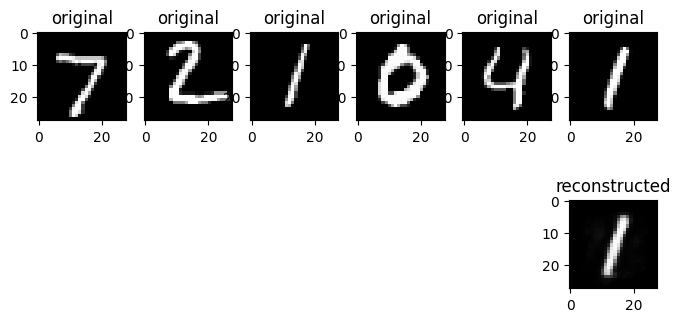

In [ ]:
encoded_imgs = simple_autoencoder.encoder(x_test).numpy()
decoded_imgs = simple_autoencoder.decoder(encoded_imgs).numpy()

n = 6
plt.figure(figsize=(8, 4))
for i in range(n) :
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()

# display reconstruction
ax = plt.subplot(2, n, i + 1 + n)
plt.imshow(decoded_imgs[i])
plt.title("reconstructed")
plt.gray()

plt.show()


#Conclusion

In brief, Autoencoders are adaptable architectures crucial in deep learning. They excel in tasks like image compression and anomaly detection by effectively learning data representations across different types. Remaining pivotal in deep learning, they drive innovation in understanding data patterns and representations.

#How Autoencoders works ?

#Implementing a deep convolutional autoencoder

Now let’s look at an example of a TensorFlow-based deep convolutional autoencoder. We’ll use the Olivetti faces dataset as it small in size, fits the purposes, and contains many expressions.

#Step #1: Load the 400 64 × 64 grayscale image samples to prepare the set for training:

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces(shuffle=True, random_state=1000)
X_train = faces['images']


#Step2

Now, to increase the speed of our computation, we will resize them to 32 × 32. This will also help avoid any memory issues. We may lose a minor visual precision. Note that you can skip this if you have high computational resources.

#Step #3: Let’s define the main constants

In [ ]:
import tensorflow as tf

nb_epochs = 600
batch_size = 50
code_length = 256
width = 32
height = 32

graph = tf.Graph()



#Step #4:

Using 50 samples per batch, we will now train the model for 600 epochs. With images size of 64 × 64 = 4, 096, we’ll get the compression ratio of 4, 096/256 = 16 times. You can always try different configurations for maximizing convergence speed and the ultimate accuracy.

#Step #5

Model the encoder architecture

In [ ]:
import tensorflow as tf

# Assuming X_train is already defined

input_images_xl = tf.keras.layers.Input(shape=(X_train.shape[1], X_train.shape[2], 1))

input_images = tf.image.resize(input_images_xl, (width, height), method=tf.image.ResizeMethod.BICUBIC)

conv_0 = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(2, 2), activation='relu', padding='same')(input_images)
conv_1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(conv_0)
conv_2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(conv_1)
conv_3 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(conv_2)


The following is the coding part of the DAG:

In [ ]:
import tensorflow as tf

# Assuming conv_3 is defined
code_flatten = tf.keras.layers.Flatten()(conv_3)
code_layer = tf.keras.layers.Dense(units=code_length, activation='sigmoid')(code_flatten)
code_mean = tf.reduce_mean(code_layer, axis=1)


Now, let’s look at the DAG decoder:

In [ ]:
import tensorflow as tf

with graph.as_default():

	# Decoder
	decoder_input = tf.reshape(code_layer,
					(-1, int(width / 2),
					int(height / 2), 1))

	convt_0 = tf.layers.conv2d_transpose(inputs=decoder_input,
										filters=128,
										kernel_size=(3, 3),
										strides=(2, 2),
										activation=tf.nn.relu,
										padding='same')

	convt_1 = tf.layers.conv2d_transpose(inputs=convt_0,
										filters=64,
										kernel_size=(3, 3),
										activation=tf.nn.relu,
										padding='same')

	convt_2 = tf.layers.conv2d_transpose(inputs=convt_1,
										filters=32,
										kernel_size=(3, 3),
										activation=tf.nn.relu,
										padding='same')

	convt_3 = tf.layers.conv2d_transpose(inputs=convt_2,
										filters=1,
										kernel_size=(3, 3),
										activation=tf.sigmoid,
										padding='same')

	output_images = tf.image.resize_images(convt_3, (X_train.shape[1],
													X_train.shape[2]),
								method=tf.image.ResizeMethod.BICUBIC)


#Step #6: Here’s how you define the loss function and the Adam optimizer –

In [ ]:
import tensorflow as tf

with graph.as_default():
	# Loss
	loss = tf.nn.l2_loss(convt_3 - input_images)

	# Training step
	training_step = tf.train.AdamOptimizer(0.001).minimize(loss)


#Step #7: Now that we have defined the full DAG, we can start the session and initialize all variables.

In [ ]:
import tensorflow as tf

session = tf.InteractiveSession(graph=graph)
tf.global_variables_initializer().run()


#Step #8: We can start the training process after the initialization of TensorFlow:

In [ ]:
import numpy as np

for e in range(nb_epochs):
	np.random.shuffle(X_train)

	total_loss = 0.0
	code_means = []

	for i in range(0, X_train.shape[0] - batch_size, batch_size):
		X = np.expand_dims(X_train[i:i + batch_size, :, :],
								axis=3).astype(np.float32)

		_, n_loss, c_mean = session.run([training_step, loss, code_mean],
										feed_dict={input_images_xl: X})

		total_loss += n_loss
		code_means.append(c_mean)

	print('Epoch {}) Average loss per sample: {} (Code mean: {})'.
		format(e + 1, total_loss / float(X_train.shape[0]),
		np.mean(code_means)))


Epoch 1/10
13/13 [==============================] - 9s 464ms/step - loss: 0.1177
Epoch 2/10
13/13 [==============================] - 8s 627ms/step - loss: 0.0011
Epoch 3/10
13/13 [==============================] - 4s 310ms/step - loss: 1.0486e-04
Epoch 4/10
13/13 [==============================] - 4s 279ms/step - loss: 5.0311e-05
Epoch 5/10
13/13 [==============================] - 5s 407ms/step - loss: 3.9642e-05
Epoch 6/10
13/13 [==============================] - 4s 319ms/step - loss: 3.6253e-05
Epoch 7/10
13/13 [==============================] - 4s 303ms/step - loss: 3.4606e-05
Epoch 8/10
13/13 [==============================] - 6s 439ms/step - loss: 3.3411e-05
Epoch 9/10
13/13 [==============================] - 4s 307ms/step - loss: 3.2331e-05
Epoch 10/10
13/13 [==============================] - 4s 284ms/step - loss: 3.1282e-05


When the training process culminates, 0.46 (considering 32 × 32 images) is the average loss per sample and 0.42 is the mean of the codes. This proves that the encoding is relatively dense bringing the average to 0.5. Our focus is to look at sparsity during the comparison of the result.

#Conclusion

In brief, denoising autoencoders focus on removing noise and restoring the original sample, sharing similarities with standard autoencoders. They may require larger layers and dimensions to handle corrupted inputs and recover samples from a broader feature space. Testing smaller models first and gradually increasing capacity is recommended. Strategies involve adding noise through various methods, with heteroscedastic noise often preferred for improved system robustness.

#Implementing Variational Autoencoder

In this implementation, we will be using the Fashion-MNIST dataset, this dataset is already available in keras.datasets API, so we don’t need to add or upload manually. You can also find the implementation in the from an.

#Importing Libraries

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers


#Creating a Sampling Layer

For variational autoencoders, we need to define the architecture of two parts encoder and decoder but first, we will define the bottleneck layer of architecture, the sampling layer.

In [ ]:
# this sampling layer is the bottleneck layer of variational autoencoder,
# it uses the output from two dense layers z_mean and z_log_var as input,
# convert them into normal distribution and pass them to the decoder layer

class Sampling(layers.Layer):
	"""Uses (mean, log_var) to sample z, the vector encoding a digit."""

	def call(self, inputs):
		mean, log_var = inputs
		batch = tf.shape(mean)[0]
		dim = tf.shape(mean)[1]
		epsilon = tf.random.normal(shape=(batch, dim))
		return mean + tf.exp(0.5 * log_var) * epsilon


#Define Encoder Block

Now, we define the architecture of encoder part of our autoencoder, this part takes images as input and encodes their representation in the Sampling layer.

In [ ]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(128, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
mean = layers.Dense(latent_dim, name="mean")(x)
log_var = layers.Dense(latent_dim, name="log_var")(x)
z = Sampling()([mean, log_var])
encoder = keras.Model(encoder_inputs, [mean, log_var, z], name="encoder")
encoder.summary()


Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_5 (Conv2D)           (None, 14, 14, 64)           640       ['input_2[0][0]']             
                                                                                                  
 conv2d_6 (Conv2D)           (None, 7, 7, 128)            73856     ['conv2d_5[0][0]']            
                                                                                                  
 flatten (Flatten)           (None, 6272)                 0         ['conv2d_6[0][0]']            
                                                                                            

#Define Decoder Block

Now, we define the architecture of decoder part of our autoencoder, this part takes the output of the sampling layer as input and output an image of size (28, 28, 1) .

In [ ]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(128, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_1 (Dense)             (None, 3136)              9408      
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 128)       73856     
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 28, 28, 64)        73792     
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 28, 28, 1)         577 

#Define the VAE Model

In this step, we combine the model and define the training procedure with loss functions.

In [ ]:
class VAE(keras.Model):
	def __init__(self, encoder, decoder, **kwargs):
		super().__init__(**kwargs)
		self.encoder = encoder
		self.decoder = decoder
		self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
		self.reconstruction_loss_tracker = keras.metrics.Mean(
			name="reconstruction_loss"
		)
		self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

	@property
	def metrics(self):
		return [
			self.total_loss_tracker,
			self.reconstruction_loss_tracker,
			self.kl_loss_tracker,
		]

	def train_step(self, data):
		with tf.GradientTape() as tape:
			mean,log_var, z = self.encoder(data)
			reconstruction = self.decoder(z)
			reconstruction_loss = tf.reduce_mean(
				tf.reduce_sum(
					keras.losses.binary_crossentropy(data, reconstruction),
					axis=(1, 2),
				)
			)
			kl_loss = -0.5 * (1 + log_var - tf.square(mean) - tf.exp(log_var))
			kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
			total_loss = reconstruction_loss + kl_loss
		grads = tape.gradient(total_loss, self.trainable_weights)
		self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
		self.total_loss_tracker.update_state(total_loss)
		self.reconstruction_loss_tracker.update_state(reconstruction_loss)
		self.kl_loss_tracker.update_state(kl_loss)
		return {
			"loss": self.total_loss_tracker.result(),
			"reconstruction_loss": self.reconstruction_loss_tracker.result(),
			"kl_loss": self.kl_loss_tracker.result(),
		}


#Train the VAE

Now it’s the right time to train our variational autoencoder model, we will train it for 10 epochs.  But first we need to import the fashion MNIST dataset.

In [ ]:
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()
fashion_mnist = np.concatenate([x_train, x_test], axis=0)
fashion_mnist = np.expand_dims(fashion_mnist, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(fashion_mnist, epochs=10, batch_size=128)


Epoch 1/10
547/547 [==============================] - 349s 634ms/step - loss: 268.5709 - reconstruction_loss: 259.3820 - kl_loss: 7.4015
Epoch 2/10
547/547 [==============================] - 296s 541ms/step - loss: 265.4712 - reconstruction_loss: 258.5880 - kl_loss: 7.3458
Epoch 3/10
547/547 [==============================] - 300s 548ms/step - loss: 265.3525 - reconstruction_loss: 258.2101 - kl_loss: 7.2527
Epoch 4/10
547/547 [==============================] - 297s 543ms/step - loss: 264.6930 - reconstruction_loss: 257.8435 - kl_loss: 7.1958
Epoch 5/10
547/547 [==============================] - 308s 563ms/step - loss: 264.4976 - reconstruction_loss: 257.3955 - kl_loss: 7.1165
Epoch 6/10
547/547 [==============================] - 308s 564ms/step - loss: 263.7099 - reconstruction_loss: 257.0072 - kl_loss: 7.0391
Epoch 7/10
547/547 [==============================] - 292s 533ms/step - loss: 263.6702 - reconstruction_loss: 256.7846 - kl_loss: 6.9679
Epoch 8/10
547/547 [=====================

#Display Sampled Images

In this step, we display training results, we will be displaying these results according to their values in latent space vectors.

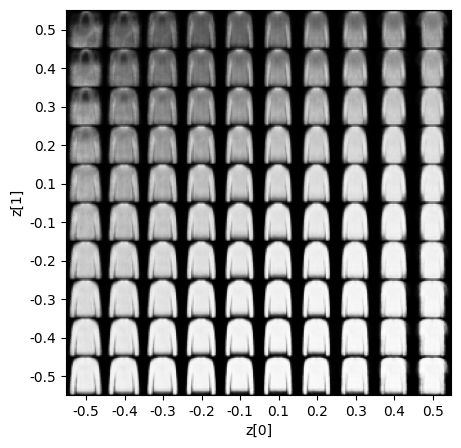

In [ ]:
import matplotlib.pyplot as plt

def plot_latent_space(vae, n=10, figsize=5):
	# display a n*n 2D manifold of images
	img_size = 28
	scale = 0.5
	figure = np.zeros((img_size * n, img_size * n))
	# linearly spaced coordinates corresponding to the 2D plot
	# of images classes in the latent space
	grid_x = np.linspace(-scale, scale, n)
	grid_y = np.linspace(-scale, scale, n)[::-1]

	for i, yi in enumerate(grid_y):
		for j, xi in enumerate(grid_x):
			sample = np.array([[xi, yi]])
			x_decoded = vae.decoder.predict(sample, verbose=0)
			images = x_decoded[0].reshape(img_size, img_size)
			figure[
				i * img_size : (i + 1) * img_size,
				j * img_size : (j + 1) * img_size,
			] = images

	plt.figure(figsize=(figsize, figsize))
	start_range = img_size // 2
	end_range = n * img_size + start_range
	pixel_range = np.arange(start_range, end_range, img_size)
	sample_range_x = np.round(grid_x, 1)
	sample_range_y = np.round(grid_y, 1)
	plt.xticks(pixel_range, sample_range_x)
	plt.yticks(pixel_range, sample_range_y)
	plt.xlabel("z[0]")
	plt.ylabel("z[1]")
	plt.imshow(figure, cmap="Greys_r")
	plt.show()


plot_latent_space(vae)


#Display Latent Space Clusters

To get a more clear view of our representational latent vectors values, we will be plotting the scatter plot of training data on the basis of their values of corresponding latent dimensions generated from the encoder .

1875/1875 [==============================] - 21s 11ms/step


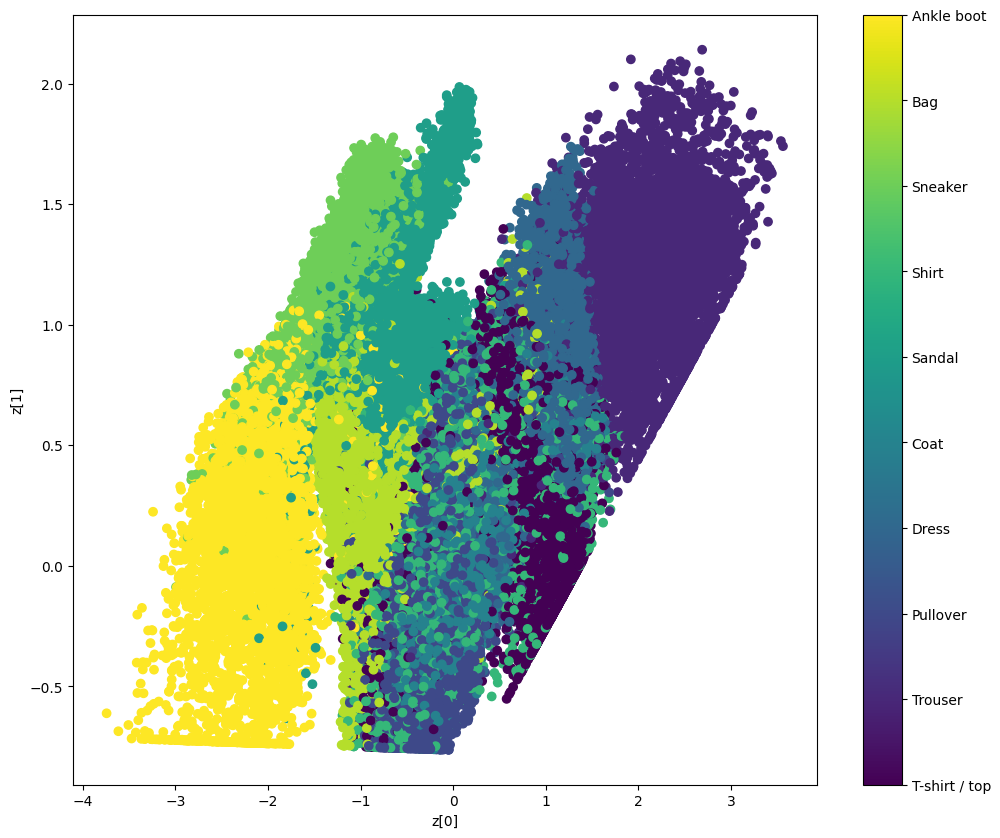

In [ ]:
def plot_label_clusters(encoder, decoder, data, test_lab):
	z_mean, _, _ = encoder.predict(data)
	plt.figure(figsize =(12, 10))
	sc = plt.scatter(z_mean[:, 0], z_mean[:, 1], c = test_lab)
	cbar = plt.colorbar(sc, ticks = range(10))
	cbar.ax.set_yticklabels([labels.get(i) for i in range(10)])
	plt.xlabel("z[0]")
	plt.ylabel("z[1]")
	plt.show()


labels = {0 :"T-shirt / top",
1: "Trouser",
2: "Pullover",
3: "Dress",
4: "Coat",
5: "Sandal",
6: "Shirt",
7: "Sneaker",
8: "Bag",
9: "Ankle boot"}

(x_train, y_train), _ = keras.datasets.fashion_mnist.load_data()
x_train = np.expand_dims(x_train, -1).astype("float32") / 255
plot_label_clusters(encoder, decoder, x_train, y_train)


#Conclusion

The implementation section offered a practical guide using Fashion-MNIST, Keras, and TensorFlow. It detailed encoder, decoder, and sampling layer definitions for VAE model creation, presenting training outcomes like loss values and latent space visualization.

#Contractive Autoencoder (CAE) implementation

Epoch:  0
Step: 0, Loss: 3487.7861328125
Epoch:  1
Step: 0, Loss: 3014.97900390625
Epoch:  2
Step: 0, Loss: 2922.27880859375
Epoch:  3
Step: 0, Loss: 2810.005126953125
Epoch:  4
Step: 0, Loss: 2726.181640625
Epoch:  5
Step: 0, Loss: 2460.587890625
Epoch:  6
Step: 0, Loss: 2354.580078125
Epoch:  7
Step: 0, Loss: 2247.38037109375
Epoch:  8
Step: 0, Loss: 2160.5927734375
Epoch:  9
Step: 0, Loss: 2119.670166015625


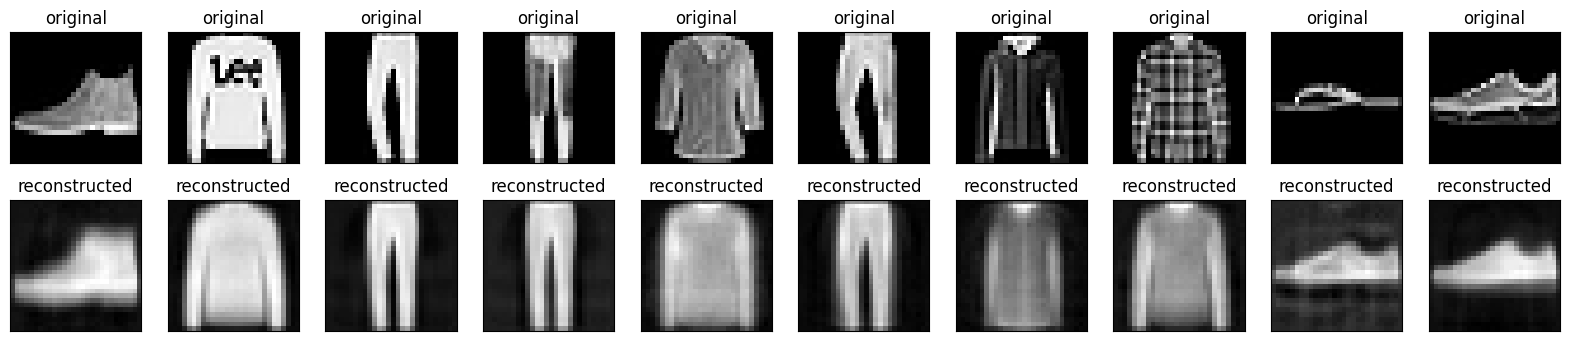

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

class AutoEncoder(tf.keras.Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.flatten_layer = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(64, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(32, activation=tf.nn.relu)
        self.bottleneck = tf.keras.layers.Dense(16, activation=tf.nn.relu)
        self.dense4 = tf.keras.layers.Dense(32, activation=tf.nn.relu)
        self.dense5 = tf.keras.layers.Dense(64, activation=tf.nn.relu)
        self.dense_final = tf.keras.layers.Dense(784)

    def call(self, inp):
        x_reshaped = self.flatten_layer(inp)
        x = self.dense1(x_reshaped)
        x = self.dense2(x)
        x = self.bottleneck(x)
        x_hid = x
        x = self.dense4(x)
        x = self.dense5(x)
        x = self.dense_final(x)
        return x, x_reshaped, x_hid

def loss(x, x_bar, h, model):
    reconstruction_loss = tf.reduce_mean(tf.keras.losses.mse(x, x_bar))
    reconstruction_loss *= 28 * 28
    W = tf.Variable(model.bottleneck.weights[0])
    dh = h * (1 - h) # N_batch x N_hidden
    W = tf.transpose(W)
    contractive = my_lambda * tf.reduce_sum(tf.linalg.matmul(dh**2, tf.square(W)), axis=1)
    total_loss = reconstruction_loss + contractive
    return total_loss

def grad(model, inputs):
    with tf.GradientTape() as tape:
        reconstruction, inputs_reshaped, hidden = model(inputs)
        loss_value = loss(inputs_reshaped, reconstruction, hidden, model)
    return loss_value, tape.gradient(loss_value, model.trainable_variables), inputs_reshaped, reconstruction

# load dataset
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# train the model
model = AutoEncoder()
optimizer = tf.optimizers.Adam(learning_rate=0.001)
global_step = tf.Variable(0)
my_lambda = 100
num_epochs = 10
batch_size = 128

for epoch in range(num_epochs):
    print("Epoch: ", epoch)
    for x in range(0, len(x_train), batch_size):
        x_inp = x_train[x : x + batch_size]
        loss_value, grads, inputs_reshaped, reconstruction = grad(model, x_inp)
        optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)

    print("Step: {}, Loss: {}".format(global_step.numpy(), tf.reduce_sum(loss_value)))

# generate results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    reconstruction, inputs_reshaped, hidden = model(x_test[i].reshape((1, 784)))
    plt.imshow(reconstruction.numpy().reshape((28, 28)))
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


##ML | AutoEncoder with TensorFlow 2.0

This tutorial illustrates TensorFlow 2.0 graph mode for training an Autoencoder to generate handwritten digit images. Autoencoders compress and reconstruct data using Neural Networks, beneficial for understanding this algorithm. They serve as a foundation for advanced generative models like GANs and CVAEs.

#Importing libraries

In [ ]:
# Install TensorFlow 2.0 by using the following command
# For CPU installation
# pip install -q tensorflow == 2.0
# For GPU installation (CUDA and CuDNN must be available)
# pip install -q tensorflow-gpu == 2.0

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


import tensorflow as tf
print(tf.__version__)


2.15.0


After confirming the appropriate TF download, import the other dependencies for data augmentation and define custom functions as shown below. The standard scaler scales the data by transforming the columns. The get_random_block_from_data function is useful when using tf.GradientTape to perform AutoDiff (Automatic Differentiation) to get the gradients.

In [ ]:
import numpy as np
import sklearn.preprocessing as prep
import tensorflow.keras.layers as layers

def standard_scale(X_train, X_test):
	preprocessor = prep.StandardScaler().fit(X_train)
	X_train = preprocessor.transform(X_train)
	X_test = preprocessor.transform(X_test)
	return X_train, X_test

def get_random_block_from_data(data, batch_size):
	start_index = np.random.randint(0, len(data) - batch_size)
	return data[start_index:(start_index + batch_size)]


Here we will use TensorFlow Subclassing API to define custom layers for the encoder and decoder.

In [ ]:
class Encoder(tf.keras.layers.Layer):
	'''Encodes a digit from the MNIST dataset'''

	def __init__(self,
				n_dims,
				name ='encoder',
				**kwargs):
		super(Encoder, self).__init__(name = name, **kwargs)
		self.n_dims = n_dims
		self.n_layers = 1
		self.encode_layer = layers.Dense(n_dims, activation ='relu')

	@tf.function
	def call(self, inputs):
		return self.encode_layer(inputs)

class Decoder(tf.keras.layers.Layer):
	'''Decodes a digit from the MNIST dataset'''

	def __init__(self,
				n_dims,
				name ='decoder',
				**kwargs):
		super(Decoder, self).__init__(name = name, **kwargs)
		self.n_dims = n_dims
		self.n_layers = len(n_dims)
		self.decode_middle = layers.Dense(n_dims[0], activation ='relu')
		self.recon_layer = layers.Dense(n_dims[1], activation ='sigmoid')

	@tf.function
	def call(self, inputs):
		x = self.decode_middle(inputs)
		return self.recon_layer(x)


Notice the @tf.function function decorator. It ensures that the function execution occurs in a graph which speeds up our execution.

In [ ]:
class Autoencoder(tf.keras.Model):
	'''Vanilla Autoencoder for MNIST digits'''

	def __init__(self,
				n_dims =[200, 392, 784],
				name ='autoencoder',
				**kwargs):
		super(Autoencoder, self).__init__(name = name, **kwargs)
		self.n_dims = n_dims
		self.encoder = Encoder(n_dims[0])
		self.decoder = Decoder([n_dims[1], n_dims[2]])

	@tf.function
	def call(self, inputs):
		x = self.encoder(inputs)
		return self.decoder(x)


The following code block prepares the dataset and gets the data ready to be fed into the pre-processing pipeline of functions before training the AutoEncoder.

In [ ]:
mnist = tf.keras.datasets.mnist

(X_train, _), (X_test, _) = mnist.load_data()
X_train = tf.cast(np.reshape(
		X_train, (X_train.shape[0],
				X_train.shape[1] * X_train.shape[2])), tf.float64)
X_test = tf.cast(
		np.reshape(X_test,
				(X_test.shape[0],
					X_test.shape[1] * X_test.shape[2])), tf.float64)

X_train, X_test = standard_scale(X_train, X_test)


11490434/11490434 [==============================] - 0s 0us/step


It is TensorFlow best practice to use tf.data.Dataset to get tensor slices with a shuffled batch quickly from the dataset for training. The following code block demonstrates the use of tf.data and also defines the hyperparameters for training the AutoEncoder model.

#Eager mode training

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices(
		X_train).batch(128).shuffle(buffer_size = 1024)
test_data = tf.data.Dataset.from_tensor_slices(
		X_test).batch(128).shuffle(buffer_size = 512)

n_samples = int(len(X_train) + len(X_test))
training_epochs = 20
batch_size = 128
display_step = 1

optimizer = tf.optimizers.Adam(learning_rate = 0.01)
mse_loss = tf.keras.losses.MeanSquaredError()
loss_metric = tf.keras.metrics.Mean()


We have completed every pre-requisite to train our AutoEncoder model! All we have left to do is to define an AutoEncoder object and compile the model with the optimizer and loss before calling model.train on it for the hyperparameters defined above. Voila! You can see the loss reducing and the AutoEncoder improving its performance!

#Graph mode training

In [ ]:
ae = Autoencoder([200, 392, 784])
ae.compile(optimizer = tf.optimizers.Adam(0.01),
		loss ='categorical_crossentropy')
ae.fit(X_train, X_train, batch_size = 64, epochs = 5)


Epoch 1/5
938/938 [==============================] - 14s 14ms/step - loss: -1511.2451
Epoch 2/5
938/938 [==============================] - 14s 15ms/step - loss: -1500.8142
Epoch 3/5
938/938 [==============================] - 14s 15ms/step - loss: -1483.0105
Epoch 4/5
938/938 [==============================] - 13s 14ms/step - loss: -1476.2628
Epoch 5/5
938/938 [==============================] - 14s 15ms/step - loss: -1465.0936


#Implementing an Autoencoder in PyTorch

#Modules Needed
torch: This python package provides high-level tensor computation and deep neural networks built on autograd system.

In [ ]:
pip install torch

torchvision: This module consists of a wide range of databases, image architectures, and transformations for computer vision

In [ ]:
pip install torchvision

#Step 1: Importing Modules

In [ ]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt


#Step 2: Loading the Dataset

This snippet loads the MNIST dataset into loader using DataLoader module. The dataset is downloaded and transformed into image tensors. Using the DataLoader module

In [ ]:
# Transforms images to a PyTorch Tensor
tensor_transform = transforms.ToTensor()

# Download the MNIST Dataset
dataset = datasets.MNIST(root = "./data",
						train = True,
						download = True,
						transform = tensor_transform)

# DataLoader is used to load the dataset
# for training
loader = torch.utils.data.DataLoader(dataset = dataset,
									batch_size = 32,
									shuffle = True)


100%|██████████| 9912422/9912422 [00:00<00:00, 92750961.50it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 66741429.10it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 29582651.34it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 4774568.61it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



#Step 3: Create Autoencoder Class

The encoder starts with 28*28 nodes in a Linear layer followed by a ReLU layer, and it goes on until the dimensionality is reduced to 9 nodes.

In [ ]:
# Creating a PyTorch class
# 28*28 ==> 9 ==> 28*28
class AE(torch.nn.Module):
	def __init__(self):
		super().__init__()

		# Building an linear encoder with Linear
		# layer followed by Relu activation function
		# 784 ==> 9
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(28 * 28, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 9)
		)

		# Building an linear decoder with Linear
		# layer followed by Relu activation function
		# The Sigmoid activation function
		# outputs the value between 0 and 1
		# 9 ==> 784
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(9, 18),
			torch.nn.ReLU(),
			torch.nn.Linear(18, 36),
			torch.nn.ReLU(),
			torch.nn.Linear(36, 64),
			torch.nn.ReLU(),
			torch.nn.Linear(64, 128),
			torch.nn.ReLU(),
			torch.nn.Linear(128, 28 * 28),
			torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded


#Step 4: Initializing Model

In [ ]:
# Model Initialization
model = AE()

# Validation using MSE Loss function
loss_function = torch.nn.MSELoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
							lr = 1e-1,
							weight_decay = 1e-8)


#Step 5: Create Output Generation

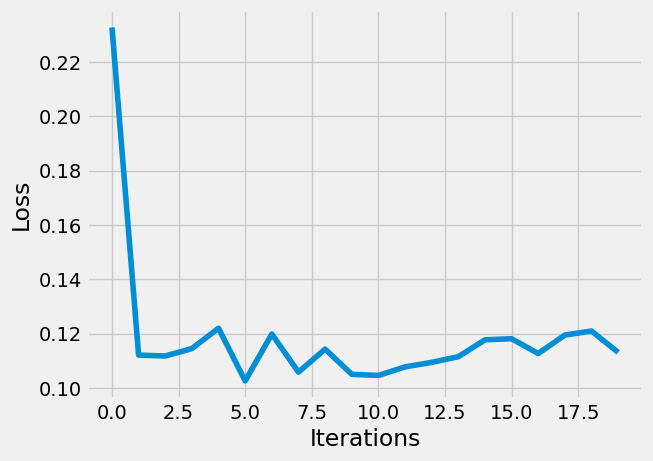

In [ ]:
epochs = 20
outputs = []
losses = []
for epoch in range(epochs):
	for (image, _) in loader:
		image = image.reshape(-1, 28*28)

	# Output of Autoencoder
	reconstructed = model(image)

	# Calculating the loss function
	loss = loss_function(reconstructed, image)

	# The gradients are set to zero,
	# the gradient is computed and stored.
	# .step() performs parameter update
	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	# Storing the losses in a list for plotting
	losses.append(loss)
	outputs.append((epochs, image, reconstructed))

# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
# Plotting the last 100 values
plt.plot([l.detach().numpy() for l in losses[-100:]])


#Step 6: Input/Reconstructed Input to/from Autoencoder



The first input image array and the first reconstructed input image array have been plotted using plt.imshow().

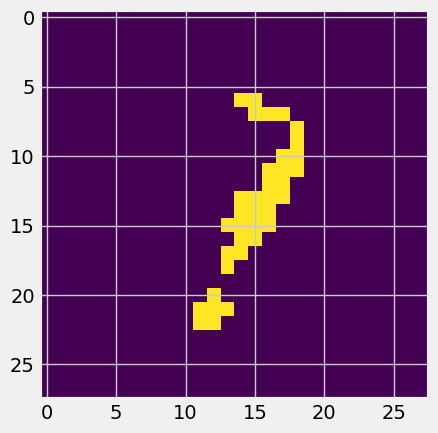

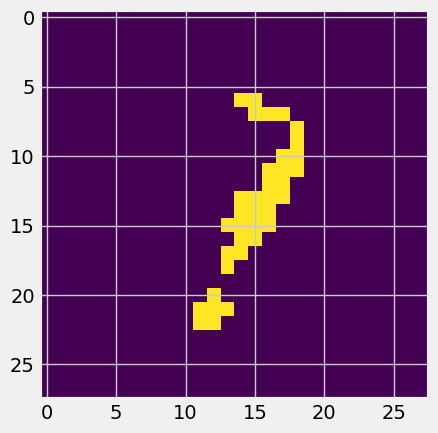

In [ ]:
for i, item in enumerate(image):

  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])

# Affichage des deux premières images reconstruites
for i in range(2):
    item = reconstructed[i].detach().numpy().reshape(-1, 28, 28)
    plt.imshow(item[0])
    plt.show()


Although the rebuilt pictures appear to be adequate, they are extremely grainy. To enhance this outcome, extra layers and/or neurons may be added, or the autoencoder model could be built on convolutions neural network architecture. For dimensionality reduction, autoencoders are quite beneficial. However, it might also be used for data denoising and understanding a dataset’s spread.

#Implementation of A GAN(Generative Adversarial Network)

Importing the required libraries

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:
# Define a basic transform
transform = transforms.Compose([
	transforms.ToTensor(),
	transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


Loading the Dataset

In [ ]:
train_dataset = datasets.CIFAR10(root='./data',\
			train=True, download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(train_dataset, \
								batch_size=32, shuffle=True)


100%|██████████| 170498071/170498071 [00:02<00:00, 68721678.47it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


Defining parameters to be used in later processes

In [ ]:
# Hyperparameters
latent_dim = 100
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
num_epochs = 10


Defining a Utility Class to Build the Generator

In [ ]:
# Define the generator
class Generator(nn.Module):
	def __init__(self, latent_dim):
		super(Generator, self).__init__()

		self.model = nn.Sequential(
			nn.Linear(latent_dim, 128 * 8 * 8),
			nn.ReLU(),
			nn.Unflatten(1, (128, 8, 8)),
			nn.Upsample(scale_factor=2),
			nn.Conv2d(128, 128, kernel_size=3, padding=1),
			nn.BatchNorm2d(128, momentum=0.78),
			nn.ReLU(),
			nn.Upsample(scale_factor=2),
			nn.Conv2d(128, 64, kernel_size=3, padding=1),
			nn.BatchNorm2d(64, momentum=0.78),
			nn.ReLU(),
			nn.Conv2d(64, 3, kernel_size=3, padding=1),
			nn.Tanh()
		)

	def forward(self, z):
		img = self.model(z)
		return img


Defining a Utility Class to Build the Discriminator

In [ ]:
# Define the discriminator
class Discriminator(nn.Module):
	def __init__(self):
		super(Discriminator, self).__init__()

		self.model = nn.Sequential(
		nn.Conv2d(3, 32, kernel_size=3, stride=2, padding=1),
		nn.LeakyReLU(0.2),
		nn.Dropout(0.25),
		nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
		nn.ZeroPad2d((0, 1, 0, 1)),
		nn.BatchNorm2d(64, momentum=0.82),
		nn.LeakyReLU(0.25),
		nn.Dropout(0.25),
		nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
		nn.BatchNorm2d(128, momentum=0.82),
		nn.LeakyReLU(0.2),
		nn.Dropout(0.25),
		nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
		nn.BatchNorm2d(256, momentum=0.8),
		nn.LeakyReLU(0.25),
		nn.Dropout(0.25),
		nn.Flatten(),
		nn.Linear(256 * 5 * 5, 1),
		nn.Sigmoid()
	)

	def forward(self, img):
		validity = self.model(img)
		return validity


Building the Generative Adversarial Network

In [ ]:
# Define the generator and discriminator
# Initialize generator and discriminator
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

# Loss function
adversarial_loss = nn.BCELoss()

# Optimizers
optimizer_G = optim.Adam(generator.parameters()\
						, lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(discriminator.parameters()\
						, lr=lr, betas=(beta1, beta2))


Training the Generative Adversarial Network

Epoch [1/10]						Batch 100/1563 Discriminator Loss: 0.4930 Generator Loss: 1.4633
Epoch [1/10]						Batch 200/1563 Discriminator Loss: 0.4849 Generator Loss: 1.2806
Epoch [1/10]						Batch 300/1563 Discriminator Loss: 0.5687 Generator Loss: 0.8606
Epoch [1/10]						Batch 400/1563 Discriminator Loss: 0.5696 Generator Loss: 1.2615
Epoch [1/10]						Batch 500/1563 Discriminator Loss: 0.6213 Generator Loss: 1.1548
Epoch [1/10]						Batch 600/1563 Discriminator Loss: 0.6837 Generator Loss: 0.8983
Epoch [1/10]						Batch 700/1563 Discriminator Loss: 0.7388 Generator Loss: 0.8828
Epoch [1/10]						Batch 800/1563 Discriminator Loss: 0.5236 Generator Loss: 1.2934
Epoch [1/10]						Batch 900/1563 Discriminator Loss: 0.6578 Generator Loss: 1.0011
Epoch [1/10]						Batch 1000/1563 Discriminator Loss: 0.8213 Generator Loss: 1.0067
Epoch [1/10]						Batch 1100/1563 Discriminator Loss: 0.5927 Generator Loss: 1.6311
Epoch [1/10]						Batch 1200/1563 Discriminator Loss: 0.5858 Generator Loss: 0.8091
E

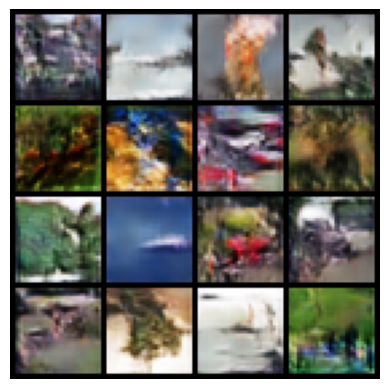

In [ ]:
# Training loop
for epoch in range(num_epochs):
	for i, batch in enumerate(dataloader):
	# Convert list to tensor
		real_images = batch[0].to(device)

		# Adversarial ground truths
		valid = torch.ones(real_images.size(0), 1, device=device)
		fake = torch.zeros(real_images.size(0), 1, device=device)

		# Configure input
		real_images = real_images.to(device)

		# ---------------------
		# Train Discriminator
		# ---------------------

		optimizer_D.zero_grad()

		# Sample noise as generator input
		z = torch.randn(real_images.size(0), latent_dim, device=device)

		# Generate a batch of images
		fake_images = generator(z)

		# Measure discriminator's ability
		# to classify real and fake images
		real_loss = adversarial_loss(discriminator\
									(real_images), valid)
		fake_loss = adversarial_loss(discriminator\
									(fake_images.detach()), fake)
		d_loss = (real_loss + fake_loss) / 2

		# Backward pass and optimize
		d_loss.backward()
		optimizer_D.step()

		# -----------------
		# Train Generator
		# -----------------

		optimizer_G.zero_grad()

		# Generate a batch of images
		gen_images = generator(z)

		# Adversarial loss
		g_loss = adversarial_loss(discriminator(gen_images), valid)

		# Backward pass and optimize
		g_loss.backward()
		optimizer_G.step()

		# ---------------------
		# Progress Monitoring
		# ---------------------

		if (i + 1) % 100 == 0:
			print(
				f"Epoch [{epoch+1}/{num_epochs}]\
						Batch {i+1}/{len(dataloader)} "
				f"Discriminator Loss: {d_loss.item():.4f} "
				f"Generator Loss: {g_loss.item():.4f}"
			)

	# Save generated images for every epoch
	if (epoch + 1) % 10 == 0:
		with torch.no_grad():
			z = torch.randn(16, latent_dim, device=device)
			generated = generator(z).detach().cpu()
			grid = torchvision.utils.make_grid(generated,\
										nrow=4, normalize=True)
			plt.imshow(np.transpose(grid, (1, 2, 0)))
			plt.axis("off")
			plt.show()


# CIFAR10 Image dataset

Importing the required libraries

In [ ]:
!pip uninstall keras
!pip install keras

Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [ ]:
from keras.layers import LeakyReLU


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
# from keras.layers.advanced_activations import LeakyReLU
# from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.layers import Conv2D, MaxPooling2D

from keras.models import Sequential, Model
from keras.optimizers import Adam,SGD


Loading the data

In [ ]:
#Loading the CIFAR10 data
(X, y), (_, _) = keras.datasets.cifar10.load_data()

#Selecting a single class images
#The number was randomly chosen and any number
#between 1 to 10 can be chosen
X = X[y.flatten() == 8]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Defining parameters to be used in later processes

In [ ]:
#Defining the Input shape
image_shape = (32, 32, 3)

latent_dimensions = 100


Defining a utility function to build the Generator

In [ ]:
def build_generator():

		model = Sequential()

		#Building the input layer
		model.add(Dense(128 * 8 * 8, activation="relu",
						input_dim=latent_dimensions))
		model.add(Reshape((8, 8, 128)))

		model.add(UpSampling2D())

		model.add(Conv2D(128, kernel_size=3, padding="same"))
		model.add(BatchNormalization(momentum=0.78))
		model.add(Activation("relu"))

		model.add(UpSampling2D())

		model.add(Conv2D(64, kernel_size=3, padding="same"))
		model.add(BatchNormalization(momentum=0.78))
		model.add(Activation("relu"))

		model.add(Conv2D(3, kernel_size=3, padding="same"))
		model.add(Activation("tanh"))


		#Generating the output image
		noise = Input(shape=(latent_dimensions,))
		image = model(noise)

		return Model(noise, image)


Defining a utility function to build the Discriminator

In [ ]:
def build_generator():

		model = Sequential()

		#Building the input layer
		model.add(Dense(128 * 8 * 8, activation="relu",
						input_dim=latent_dimensions))
		model.add(Reshape((8, 8, 128)))

		model.add(UpSampling2D())

		model.add(Conv2D(128, kernel_size=3, padding="same"))
		model.add(BatchNormalization(momentum=0.78))
		model.add(Activation("relu"))

		model.add(UpSampling2D())

		model.add(Conv2D(64, kernel_size=3, padding="same"))
		model.add(BatchNormalization(momentum=0.78))
		model.add(Activation("relu"))

		model.add(Conv2D(3, kernel_size=3, padding="same"))
		model.add(Activation("tanh"))


		#Generating the output image
		noise = Input(shape=(latent_dimensions,))
		image = model(noise)

		return Model(noise, image)


Defining a utility function to build the Discriminator

In [ ]:
def build_discriminator():

		#Building the convolutional layers
		#to classify whether an image is real or fake
		model = Sequential()

		model.add(Conv2D(32, kernel_size=3, strides=2,
						input_shape=image_shape, padding="same"))
		model.add(LeakyReLU(alpha=0.2))
		model.add(Dropout(0.25))

		model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
		model.add(ZeroPadding2D(padding=((0,1),(0,1))))
		model.add(BatchNormalization(momentum=0.82))
		model.add(LeakyReLU(alpha=0.25))
		model.add(Dropout(0.25))

		model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
		model.add(BatchNormalization(momentum=0.82))
		model.add(LeakyReLU(alpha=0.2))
		model.add(Dropout(0.25))

		model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
		model.add(BatchNormalization(momentum=0.8))
		model.add(LeakyReLU(alpha=0.25))
		model.add(Dropout(0.25))

		#Building the output layer
		model.add(Flatten())
		model.add(Dense(1, activation='sigmoid'))

		image = Input(shape=image_shape)
		validity = model(image)

		return Model(image, validity)


Defining a utility function to display the generated images

In [ ]:
def display_images():
		r, c = 4,4
		noise = np.random.normal(0, 1, (r * c,latent_dimensions))
		generated_images = generator.predict(noise)

		#Scaling the generated images
		generated_images = 0.5 * generated_images + 0.5

		fig, axs = plt.subplots(r, c)
		count = 0
		for i in range(r):
			for j in range(c):
				axs[i,j].imshow(generated_images[count, :,:,])
				axs[i,j].axis('off')
				count += 1
		plt.show()
		plt.close()


Building the Generative Adversarial Network

In [ ]:
!pip uninstall keras
!pip install keras


Found existing installation: keras 3.0.2
Uninstalling keras-3.0.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-3.0.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-3.0.2
  Using cached keras-3.0.2-py3-none-any.whl (1.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [ ]:
!pip install keras==2.15.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.2
    Uninstalling keras-3.0.2:
      Successfully uninstalled keras-3.0.2


In [ ]:
from keras.layers import UpSampling2D, Conv2D, Reshape, Dense, Flatten
# Building and compiling the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy',
					optimizer=Adam(0.0002,0.5),
					metrics=['accuracy'])

#Making the Discriminator untrainable
#so that the generator can learn from fixed gradient
discriminator.trainable = False

# Building the generator
generator = build_generator()

#Defining the input for the generator
#and generating the images
z = Input(shape=(latent_dimensions,))
image = generator(z)


#Checking the validity of the generated image
valid = discriminator(image)

#Defining the combined model of the Generator and the Discriminator
combined_network = Model(z, valid)
combined_network.compile(loss='binary_crossentropy',
						optimizer=Adam(0.0002,0.5))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  strides=1,
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:73: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  


Training the network

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py:74: UserWarning: The model does not have any trainable weights.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 546ms/step


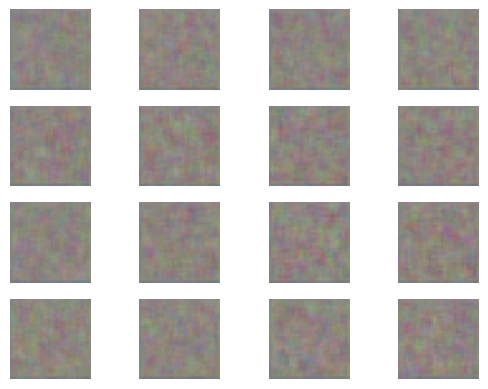

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
num_epochs=1000
batch_size=32
display_interval=2500
losses=[]

#Normalizing the input
X = (X / 127.5) - 1.


#Defining the Adversarial ground truths
valid = np.ones((batch_size, 1))

#Adding some noise
valid += 0.05 * np.random.random(valid.shape)
fake = np.zeros((batch_size, 1))
fake += 0.05 * np.random.random(fake.shape)

for epoch in range(num_epochs):

			#Training the Discriminator

			#Sampling a random half of images
			index = np.random.randint(0, X.shape[0], batch_size)
			images = X[index]

			#Sampling noise and generating a batch of new images
			noise = np.random.normal(0, 1, (batch_size, latent_dimensions))
			generated_images = generator.predict(noise)


			#Training the discriminator to detect more accurately
			#whether a generated image is real or fake
			discm_loss_real = discriminator.train_on_batch(images, valid)
			discm_loss_fake = discriminator.train_on_batch(generated_images, fake)
			discm_loss = 0.5 * np.add(discm_loss_real, discm_loss_fake)

			#Training the Generator

			#Training the generator to generate images
			#which pass the authenticity test
			genr_loss = combined_network.train_on_batch(noise, valid)

			#Tracking the progress
			if epoch % display_interval == 0:
				display_images()


A RAM problem. RAM is full : Votre session a planté après avoir utilisé toute la mémoire RAM disponible. Si vous êtes intéressé par un accès à des environnements d'exécution à mémoire RAM élevée, nous vous conseillons Colab Pro.

Plotting the original images

In [ ]:
#Plotting some of the original images
s=X[:40]
s = 0.5 * s + 0.5
f, ax = plt.subplots(5,8, figsize=(16,10))
for i, image in enumerate(s):
	ax[i//8, i%8].imshow(image)
	ax[i//8, i%8].axis('off')

plt.show()


Plotting the images generated on the last epoch

In [ ]:
#Plotting some of the last batch of generated images
noise = np.random.normal(size=(40, latent_dimensions))
generated_images = generator.predict(noise)
generated_images = 0.5 * generated_images + 0.5
f, ax = plt.subplots(5,8, figsize=(16,10))
for i, image in enumerate(generated_images):
	ax[i//8, i%8].imshow(image)
	ax[i//8, i%8].axis('off')

plt.show()


# Q-Learning

# ML | Reinforcement Learning Algorithm : Python Implementation using Q-learning

Importing the required libraries

In [ ]:
import numpy as np
import pylab as pl
import networkx as nx


Defining and visualising the graph

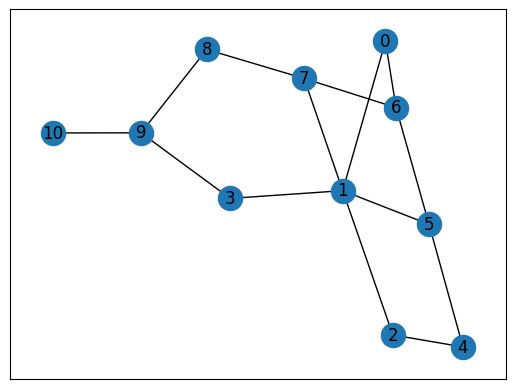

In [ ]:
edges = [(0, 1), (1, 5), (5, 6), (5, 4), (1, 2),
		(1, 3), (9, 10), (2, 4), (0, 6), (6, 7),
		(8, 9), (7, 8), (1, 7), (3, 9)]

goal = 10
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
pl.show()


Defining the reward the system for the bot

In [ ]:
MATRIX_SIZE = 11
M = np.matrix(np.ones(shape =(MATRIX_SIZE, MATRIX_SIZE)))
M *= -1

for point in edges:
	print(point)
	if point[1] == goal:
		M[point] = 100
	else:
		M[point] = 0

	if point[0] == goal:
		M[point[::-1]] = 100
	else:
		M[point[::-1]]= 0
		# reverse of point

M[goal, goal]= 100
print(M)
# add goal point round trip


(0, 1)
(1, 5)
(5, 6)
(5, 4)
(1, 2)
(1, 3)
(9, 10)
(2, 4)
(0, 6)
(6, 7)
(8, 9)
(7, 8)
(1, 7)
(3, 9)
[[ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.   0.   0.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.]
 [ -1.  -1.   0.  -1.  -1.   0.  -1.  -1.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.  -1.]
 [  0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.  -1.]
 [ -1.   0.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.  -1.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.   0.  -1.   0.  -1.]
 [ -1.  -1.  -1.   0.  -1.  -1.  -1.  -1.   0.  -1. 100.]
 [ -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.  -1.   0. 100.]]


Defining some utility functions to be used in the training

In [ ]:
import numpy as np

# Assuming MATRIX_SIZE and M are defined elsewhere

Q = np.matrix(np.zeros([MATRIX_SIZE, MATRIX_SIZE]))
gamma = 0.75
initial_state = 1

def available_actions(state):
    current_state_row = M[state, ]
    available_action = np.where(current_state_row >= 0)[1]
    return available_action

available_action = available_actions(initial_state)

def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_action, 1))
    return next_action

action = sample_next_action(available_action)

def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    if np.max(Q) > 0:
        return(np.sum(Q / np.max(Q) * 100))
    else:
        return (0)

# Call the update function to update the Q-matrix
update(initial_state, action, gamma)


0

Training and evaluating the bot using the Q-Matrix

Most efficient path:
[0, 1, 3, 9, 10]


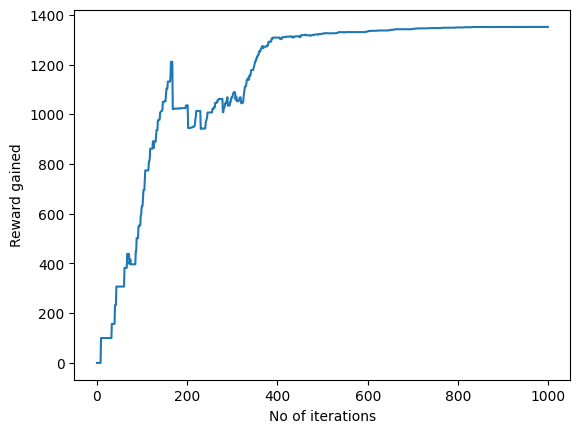

In [ ]:
scores = []
for i in range(1000):
	current_state = np.random.randint(0, int(Q.shape[0]))
	available_action = available_actions(current_state)
	action = sample_next_action(available_action)
	score = update(current_state, action, gamma)
	scores.append(score)

# print("Trained Q matrix:")
# print(Q / np.max(Q)*100)
# You can uncomment the above two lines to view the trained Q matrix

# Testing
current_state = 0
steps = [current_state]

while current_state != 10:

	next_step_index = np.where(Q[current_state, ] == np.max(Q[current_state, ]))[1]
	if next_step_index.shape[0] > 1:
		next_step_index = int(np.random.choice(next_step_index, size = 1))
	else:
		next_step_index = int(next_step_index)
	steps.append(next_step_index)
	current_state = next_step_index

print("Most efficient path:")
print(steps)

pl.plot(scores)
pl.xlabel('No of iterations')
pl.ylabel('Reward gained')
pl.show()


Defining and visualizing the new graph with the environmental clues

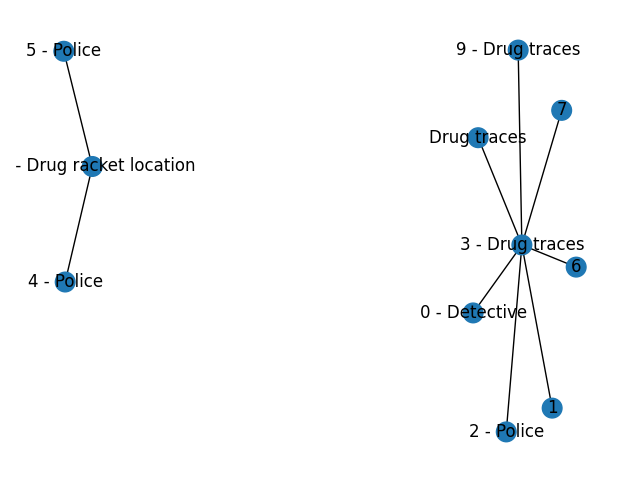

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

edges = [(0, 3), (1, 3), (2, 3), (3, 6), (3, 7), (3, 8), (3, 9), (4, 10), (5, 10)]

police = [2, 4, 5]
drug_traces = [3, 8, 9]

G = nx.Graph()
G.add_edges_from(edges)

mapping = {
    0: '0 - Detective', 1: '1', 2: '2 - Police', 3: '3 - Drug traces',
    4: '4 - Police', 5: '5 - Police', 6: '6', 7: '7', 8: 'Drug traces',
    9: '9 - Drug traces', 10: '10 - Drug racket location'
}

H = nx.relabel_nodes(G, mapping)
pos = nx.spring_layout(H)

# Définir des tailles différentes pour différents types de nœuds
node_sizes = [200 if node not in (2, 4, 5, 8, 9) else 400 for node in H.nodes()]

plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(H, pos, node_size=node_sizes)
nx.draw_networkx_edges(H, pos)
nx.draw_networkx_labels(H, pos)

plt.axis('off')
plt.show()


Defining some utility functions for the training process

In [ ]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]
    Q[current_state, action] = M[current_state, action] + gamma * max_value
    environment = collect_environmental_data(action)
    if 'p' in environment:
        env_police[current_state, action] += 1
    if 'd' in environment:
        env_drugs[current_state, action] += 1
    if np.max(Q) > 0:
        return np.sum(Q / np.max(Q) * 100)
    else:
        return 0

# Vous devez ensuite appeler cette fonction quelque part dans votre code.
# Par exemple :
# update(initial_state, action, gamma)


In [ ]:
scores = []
for i in range(1000):
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_action = available_actions(current_state)
    action = sample_next_action(available_action)
    score = update(current_state, action, gamma)


NameError: name 'collect_environmental_data' is not defined

Importing the required libraries

In [ ]:
pip install keras-rl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 522.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for keras-rl: filename=keras_rl-0.4.2-py3-none-any.whl size=48360 sha256=54c8974fbc10c2a2cc9074bfaaebdf6e5f5212f93e33f21ddac122e90771266a
  Stored in directory: /root/.cache/pip/wheels/05/a6/37/909e17a23bc31b94480c1c8d097469033c22c5f886a5d4e510
Successfully built keras-rl


In [ ]:
!pip install keras

import keras


In [ ]:
!pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [ ]:
!pip show keras


Name: keras
Version: 3.0.2
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, dm-tree, h5py, namex, numpy, rich
Required-by: keras-rl, tensorflow


In [ ]:
!pip install --upgrade keras-rl


In [ ]:
!pip show keras
!pip show keras-rl


Name: keras
Version: 3.0.2
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, dm-tree, h5py, namex, numpy, rich
Required-by: keras-rl, tensorflow
Name: keras-rl
Version: 0.4.2
Summary: Deep Reinforcement Learning for Keras
Home-page: https://github.com/keras-rl/keras-rl
Author: Matthias Plappert
Author-email: matthiasplappert@me.com
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: keras
Required-by: 


In [ ]:
!pip install keras==2.6.0
!pip install keras-rl==0.4.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 6.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.2
    Uninstalling keras-3.0.2:
      Successfully uninstalled keras-3.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.6.0 which is incompatible.


In [ ]:
import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory


Building the Environment Note

In [ ]:
# Building the environment
environment_name = 'MountainCar-v0'
env = gym.make(environment_name)
np.random.seed(0)
env.seed(0)

# Extracting the number of possible actions
num_actions = env.action_space.n


Building the learning agent

In [ ]:
!pip install keras==2.6.0
# !pip install keras==<specific_version>

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

In [ ]:

agent = Sequential()
agent.add(Flatten(input_shape =(1, ) + env.observation_space.shape))
agent.add(Dense(16))
agent.add(Activation('relu'))
agent.add(Dense(num_actions))
agent.add(Activation('linear'))


Finding the Optimal Strategy

In [ ]:
# Building the model to find the optimal strategy
strategy = EpsGreedyQPolicy()
memory = SequentialMemory(limit = 10000, window_length = 1)
dqn = DQNAgent(model = agent, nb_actions = num_actions,
			memory = memory, nb_steps_warmup = 10,
target_model_update = 1e-2, policy = strategy)
dqn.compile(Adam(lr = 1e-3), metrics =['mae'])

# Visualizing the training
dqn.fit(env, nb_steps = 5000, visualize = True, verbose = 2)


Testing the Learning Agent

In [ ]:
# Testing the learning agent
dqn.test(env, nb_episodes = 5, visualize = True)


# Using Torch

In [ ]:
import numpy as np
import gym
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from collections import namedtuple, deque
import random

# Création de l'environnement
environment_name = 'MountainCar-v0'
env = gym.make(environment_name)
np.random.seed(0)
env.seed(0)

# Extraction du nombre d'actions possibles
num_actions = env.action_space.n

# Construction du modèle DQN avec PyTorch
class DQN(nn.Module):
    def __init__(self, input_size, output_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Transition = namedtuple('Transition', ('state', 'action', 'next_state', 'reward'))

# Définition des hyperparamètres
BATCH_SIZE = 32
GAMMA = 0.99
EPS_START = 0.9
EPS_END = 0.05
EPS_DECAY = 200
TARGET_UPDATE = 10

# Initialisation du modèle, de la mémoire et de l'optimiseur
input_size = env.observation_space.shape[0]
output_size = num_actions
policy_net = DQN(input_size, output_size)
target_net = DQN(input_size, output_size)
target_net.load_state_dict(policy_net.state_dict())
target_net.eval()
optimizer = optim.Adam(policy_net.parameters())
memory = deque(maxlen=10000)

steps_done = 0

# Fonction pour sélectionner l'action
def select_action(state):
    global steps_done
    sample = np.random.random()
    eps_threshold = EPS_END + (EPS_START - EPS_END) * np.exp(-1.0 * steps_done / EPS_DECAY)
    steps_done += 1
    if sample > eps_threshold:
        with torch.no_grad():
            return policy_net(state).max(1)[1].view(1, 1)
    else:
        return torch.tensor([[np.random.choice(num_actions)]], dtype=torch.long)

# Fonction pour optimiser le modèle
def optimize_model():
    if len(memory) < BATCH_SIZE:
        return
    transitions = random.sample(memory, BATCH_SIZE)
    batch = Transition(*zip(*transitions))
    non_final_mask = torch.tensor(tuple(map(lambda s: s is not None, batch.next_state)), dtype=torch.bool)
    non_final_next_states = torch.cat([s for s in batch.next_state if s is not None])
    state_batch = torch.cat(batch.state)
    action_batch = torch.cat(batch.action)
    reward_batch = torch.cat(batch.reward)

    state_action_values = policy_net(state_batch).gather(1, action_batch)

    next_state_values = torch.zeros(BATCH_SIZE)
    next_state_values[non_final_mask] = target_net(non_final_next_states).max(1)[0].detach()
    expected_state_action_values = (next_state_values * GAMMA) + reward_batch

    loss = F.smooth_l1_loss(state_action_values, expected_state_action_values.unsqueeze(1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Entraînement de l'agent
num_episodes = 5000
for i_episode in range(num_episodes):
    state = env.reset()
    state = torch.tensor([state], dtype=torch.float32)
    for t in range(1000):
        action = select_action(state)
        next_state, reward, done, _ = env.step(action.item())
        next_state = torch.tensor([next_state], dtype=torch.float32) if not done else None
        reward = torch.tensor([reward], dtype=torch.float32)
        memory.append(Transition(state, action, next_state, reward))
        state = next_state
        optimize_model()
        if done:
            break
    if i_episode % TARGET_UPDATE == 0:
        target_net.load_state_dict(policy_net.state_dict())

print('Entraînement terminé!')

# Test de l'agent
def test_agent():
    num_episodes = 5
    for i_episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        for t in range(1000):
            state = torch.tensor([state], dtype=torch.float32)
            with torch.no_grad():
                action = policy_net(state).max(1)[1].view(1, 1)
            next_state, reward, done, _ = env.step(action.item())
            total_reward += reward
            state = next_state
            if done:
                break
        print(f"Episode {i_episode + 1}, Total Reward: {total_reward}")

# Utilisation pour tester l'agent entraîné
test_agent()


Entraînement terminé!
Episode 1, Total Reward: -177.0
Episode 2, Total Reward: -200.0
Episode 3, Total Reward: -200.0
Episode 4, Total Reward: -200.0
Episode 5, Total Reward: -181.0
